In [1223]:
# -----------------------------------------PART1 -------------------------------------------------------

In [1224]:
#Import and warehouse data

In [1225]:
#Import all the given datasets and explore shape and size

In [1226]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [1227]:
#import csv dataset 
df1 = pd.read_csv('Part1 - Car name.csv')

In [1228]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [1229]:
df1.shape

(398, 1)

In [1230]:
#import json dataset 
df2 = pd.read_json("Part1 - Car-Attributes.json")


In [1231]:
df2.shape

(398, 8)

In [1232]:
#Merge all datasets onto one and explore final shape and size.
df_merged = pd.merge(df2, df1, how='inner', left_index=True, right_index=True)

df_merged

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [1233]:
#Merged dataset shape (final shape)
df_merged.shape

(398, 9)

In [1234]:
#Exporting the final dataset and store it on local machine in csv,xlxs and json format
df_merged.to_csv('df_merged.csv', index=False)
df_merged.to_excel('df_merged.xlsx', index = False)
df_merged.to_json('df_merged.json', orient = 'split', compression = 'infer', index = 'true')

In [1235]:
#Import the data from above steps into python.
df3  = pd.read_csv('df_merged.csv')
df3

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [1236]:
#dropping/ignoring car_name 
df3 = df3.drop('car_name', axis=1)

#Replacing Origin 1 with America , 2 with Europe and 3 with Asia
df3['origin'] = df3['origin'].replace({1: 'America', 2: 'Europe', 3: 'Asia'})
df3.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [1237]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [1238]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [1239]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df3.hp.str.isdigit()) 

#print isDigit = False!
df3[hpIsDigit['hp'] == False]  

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,America
126,21.0,6,200.0,?,2875,17.0,74,America
330,40.9,4,85.0,?,1835,17.3,80,Europe
336,23.6,4,140.0,?,2905,14.3,80,America
354,34.5,4,100.0,?,2320,15.8,81,Europe
374,23.0,4,151.0,?,3035,20.5,82,America


In [1240]:
#Data cleaning
# Replace missing values with NaN
#Missing/incorrect value treatment
df3 = df3.replace('?', np.nan)
df3[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,America
126,21.0,6,200.0,NaN,2875,17.0,74,America
330,40.9,4,85.0,NaN,1835,17.3,80,Europe
336,23.6,4,140.0,NaN,2905,14.3,80,America
354,34.5,4,100.0,NaN,2320,15.8,81,Europe
374,23.0,4,151.0,NaN,3035,20.5,82,America


In [1241]:
#replace hp with median
df3['hp'].fillna((df3['hp'].median()), inplace=True)
df3['hp'] = df3['hp'].astype('float64')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [1242]:
print('The data set has no missing values \n')
df3.isnull().sum()

The data set has no missing values 



mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [1243]:
# 3 Data analysis & visualisation
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, > 17 and <29 as medium, > 29 as high  )
df3['mpg_level'] = df3['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
df3.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,America,medium
1,15.0,8,350.0,165.0,3693,11.5,70,America,low
2,18.0,8,318.0,150.0,3436,11.0,70,America,medium
3,16.0,8,304.0,150.0,3433,12.0,70,America,low
4,17.0,8,302.0,140.0,3449,10.5,70,America,medium


In [1244]:
#categorical variable
car_cat = df3.iloc[:,[1,6,7,8]]
car_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,America,medium
1,8,70,America,low
2,8,70,America,medium
3,8,70,America,low
4,8,70,America,medium


In [1245]:
#numeric variables
car_number=df3.drop(['cyl','yr','origin','mpg_level'],axis=1)
car_number.head()


,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


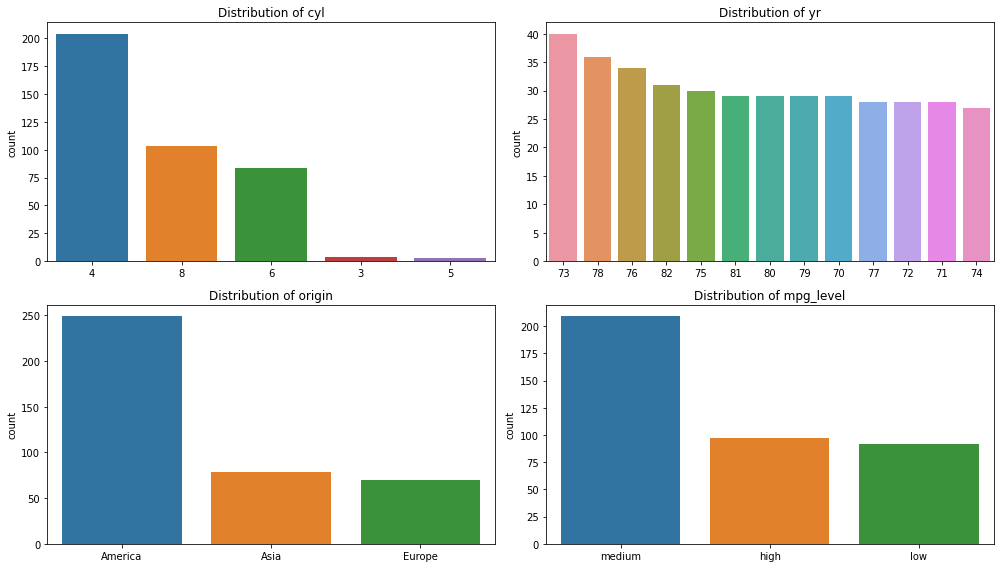

'mpg_level'

In [1246]:
#bivariate analysis
#plotting categorical variables
fig = plt.figure(1, (14, 8))

for i,df3 in enumerate(car_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(car_cat[df3], order=car_cat[df3].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {df3}')
    plt.tight_layout()

plt.show()

df3

In [1247]:
#Origin America with  4 cylinder cars produced in 1973 with medium mpg level seem to dominate the dateset

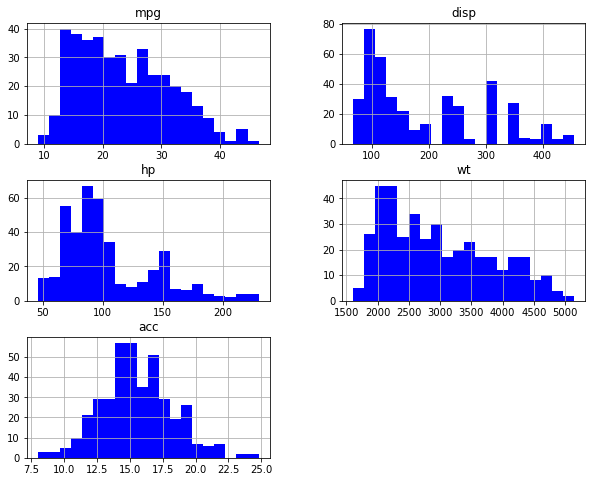

In [1248]:
#multivariate analysis
#plot histograms
car_number.hist(bins = 20, figsize = (10, 8), color = 'blue')
plt.show()

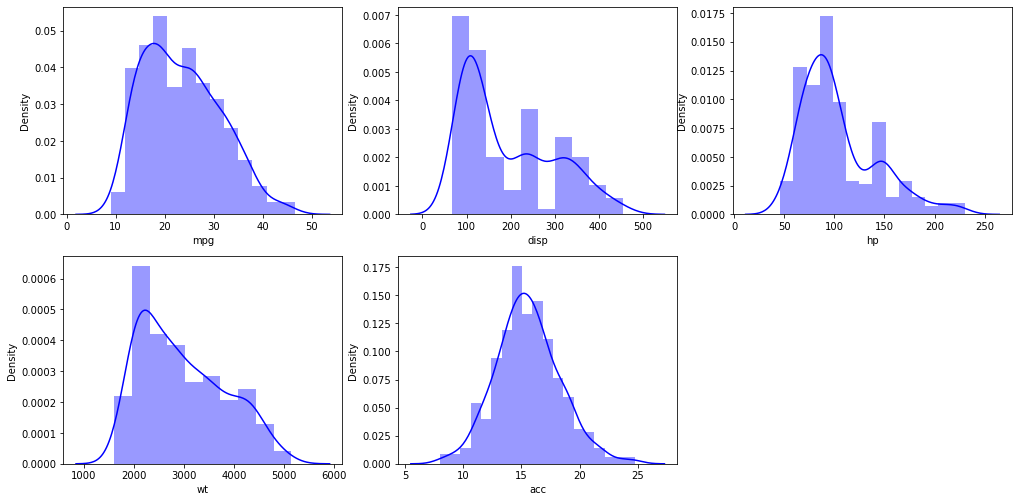

In [1249]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in car_number.columns:
    plt.subplot(3, 3, col)
    sns.distplot(car_number[i], color = 'b')
    col += 1 

In [1250]:
#disp and hp seem to be right skewed


In [1251]:
#joining the categorical and numerical variables
df3=pd.concat([car_cat,car_number],axis=1)
df3['hp'] = df3['hp'].astype('float64')
#checking for attribute type
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cyl        398 non-null    int64  
 1   yr         398 non-null    int64  
 2   origin     398 non-null    object 
 3   mpg_level  398 non-null    object 
 4   mpg        398 non-null    float64
 5   disp       398 non-null    float64
 6   hp         398 non-null    float64
 7   wt         398 non-null    int64  
 8   acc        398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


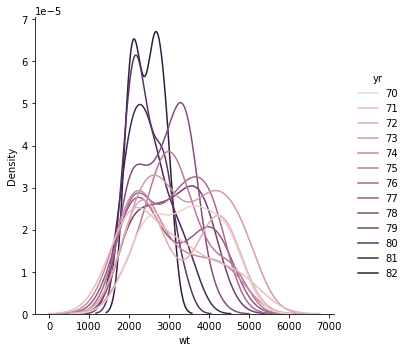

In [1252]:
#bivibrate analysis
sns.displot(data=df3, x="wt", hue=df3['yr'], kind="kde")

In [1253]:
#Conclusion
#As per year increment the car weight is getting decreased.Earlier years the cars are bulkier (having more weight).
#Year 82 the weight of car is getting decreased around 3700

In [1254]:
#MultiVariate analysis
# Perform df3.corr(method='kendall') variate analysis
df3.corr(method='kendall')

,cyl,yr,mpg,disp,hp,wt,acc
cyl,1.000000,-0.273742,-0.686477,0.794854,0.682006,0.735481,-0.367194
yr,-0.273742,1.000000,0.413661,-0.218920,-0.274888,-0.196863,0.196024
mpg,-0.686477,0.413661,1.000000,-0.679847,-0.673377,-0.694006,0.301096
disp,0.794854,-0.218920,-0.679847,1.000000,0.711556,0.800508,-0.352110
hp,0.682006,-0.274888,-0.673377,0.711556,1.000000,0.696368,-0.482267
wt,0.735481,-0.196863,-0.694006,0.800508,0.696368,1.000000,-0.268619
acc,-0.367194,0.196024,0.301096,-0.352110,-0.482267,-0.268619,1.000000


In [1255]:
#create dummy varibale for mpg_level and origin and creating a seperate datset for k-means and heirarchical clustering
df3 = pd.get_dummies(df3, columns=['origin'])
df3 = pd.get_dummies(df3, columns=['mpg_level'])
df3.head()
carH=df3.copy()
carK=df3.copy()

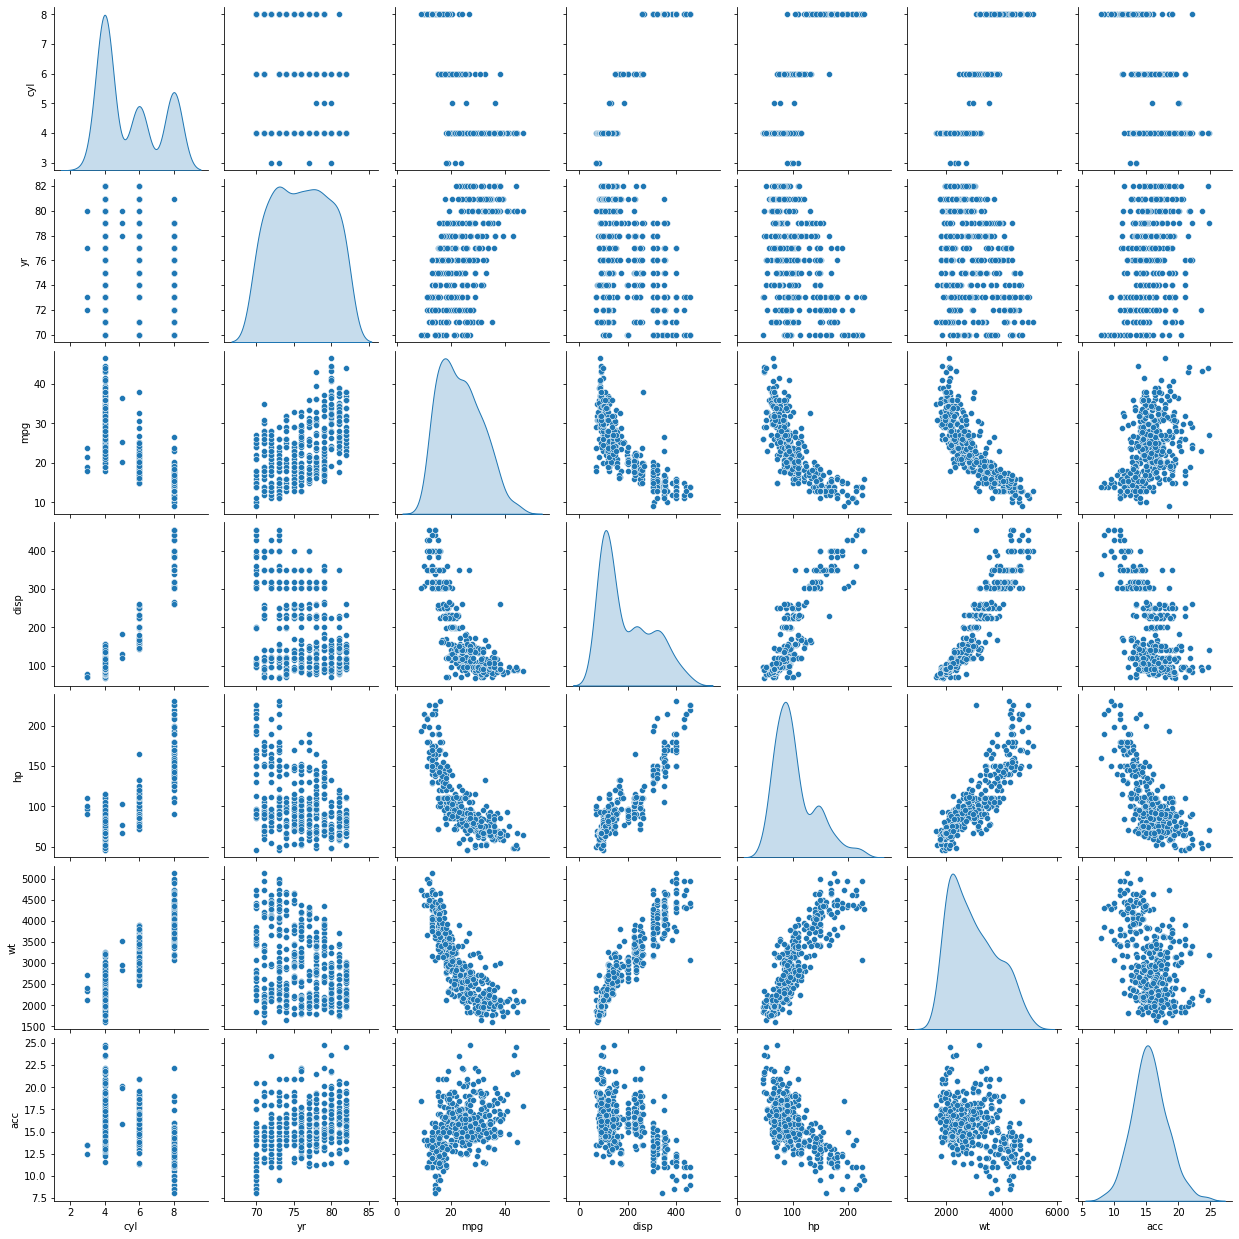

In [1256]:
#pair plot for the numeric attributes
car_attr = df3.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

In [1257]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl , disp ,hp shows 3 clusters while wt shows 2
# from bivariate plots we can see that mpg shows negative linear relationship with wt,hp and disp 
# (correlation too gives high negative correlation)

In [1258]:
#dropping the created dummy variable
df4=df3.drop(['origin_America','origin_Asia','origin_Europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

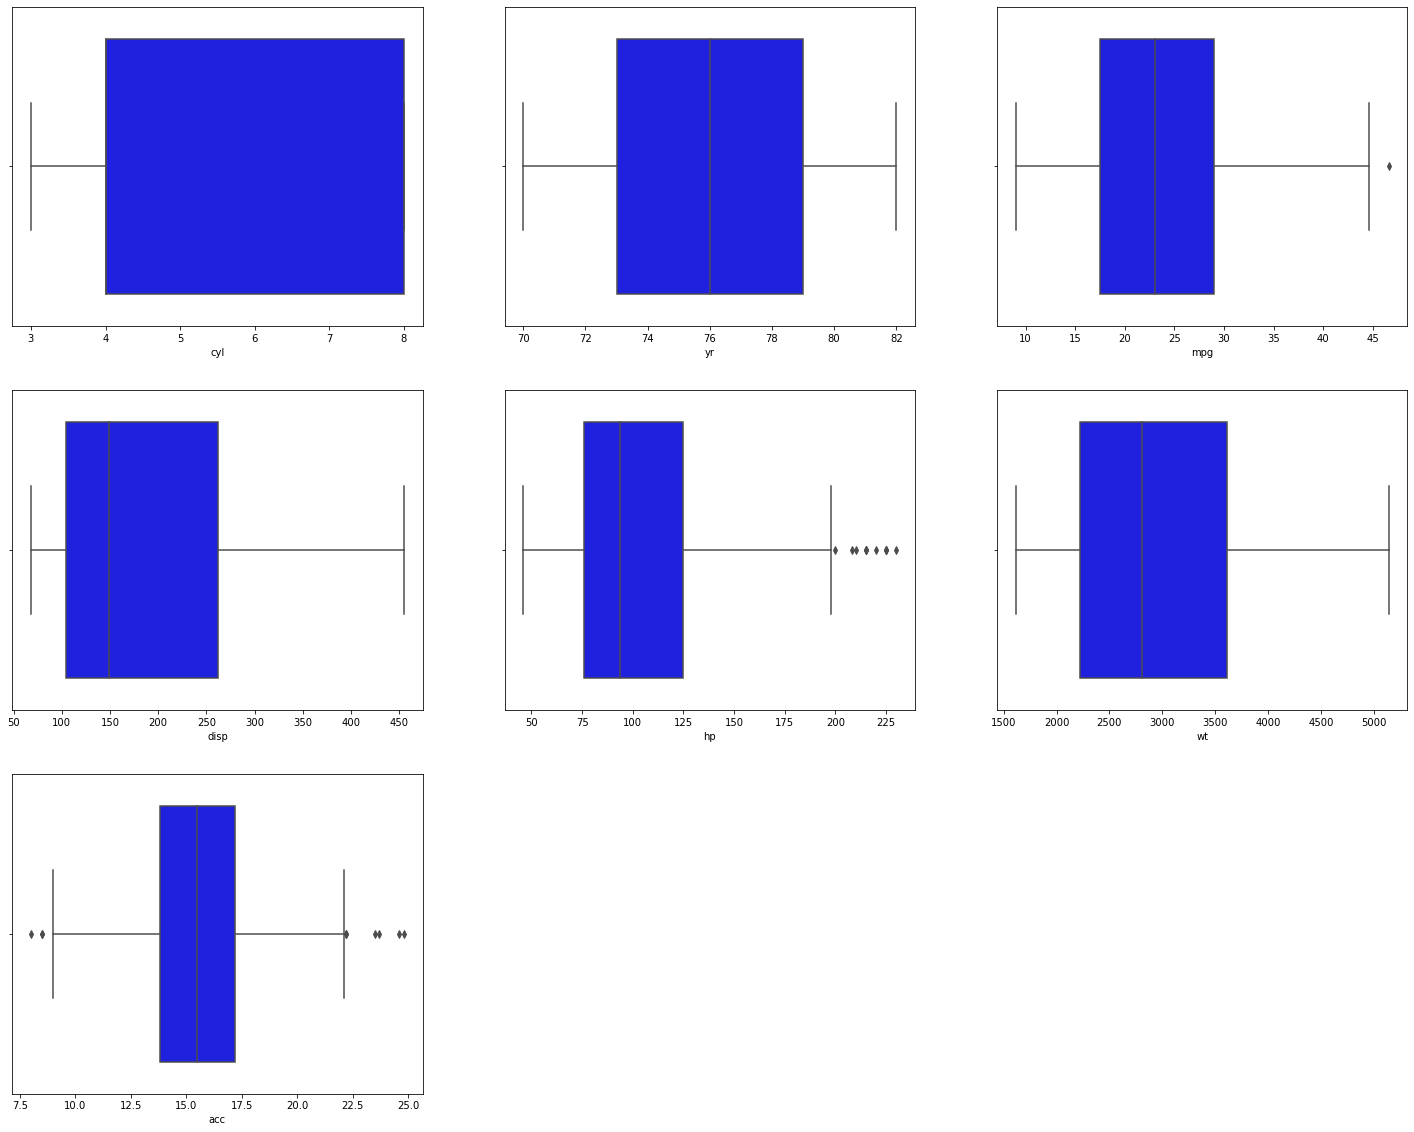

In [1259]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in df4.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(df4[i],color='blue')
    col += 1

In [1260]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(df4['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(df4['acc'], interpolation = 'midpoint')

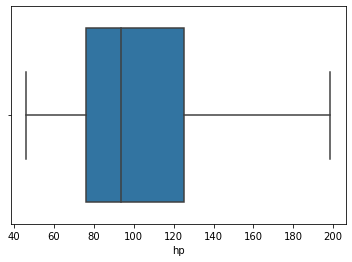

In [1261]:
#Hp after imputing outliers
Q3 = df4['hp'].quantile(0.75)
df4['hp'] = np.where(df4["hp"] >(Q3+1.5*IQR1), 198.5,df4['hp'])
sns.boxplot(df4['hp']);

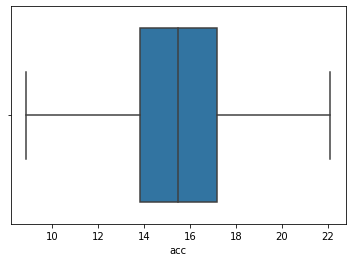

In [1262]:
#acc after imputing outliers
Q1 = df4['acc'].quantile(0.25)
Q31=df4['acc'].quantile(0.75)
df4['acc'] = np.where(df4["acc"] >(Q31+1.5*IQR2),22.10 ,df4['acc'])
df4['acc'] = np.where(df4["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),df4['acc'])
sns.boxplot(df4['acc']);

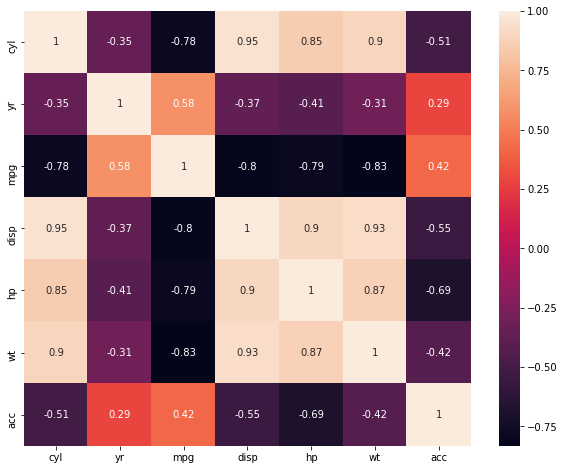

In [1263]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=df4.corr()
sns.heatmap(corr,annot=True);

In [1264]:
#Each square shows the correlation between the variables on each axis. 
#Correlation ranges from -1 to +1. 
#Values closer to zero means there is no linear trend between the two variables.
#The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship

In [1265]:
# 4. Machine learning
#K Means clustering

#seperating the numeric values
cc = df3.iloc[:,0:7] 

#Apply scaling
cc_z1 = cc.apply(stats.zscore)
cc_z1.head()



,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [1266]:
#calculatint the within sum of squares
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[2785.9999999999995, 1294.8418950727323, 946.019790855379, 738.3923281527318]

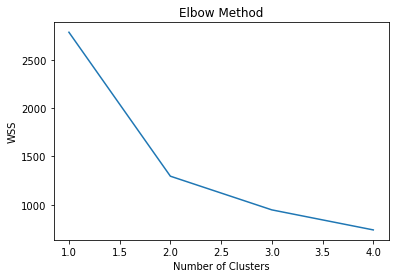

In [1267]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [1268]:
#using 2 centroids for clustering
k_means = KMeans(n_clusters = 2)
k_means.fit(cc_z1)
labels = k_means.labels_

In [1269]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.48235946103916116

In [1270]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)
    

 

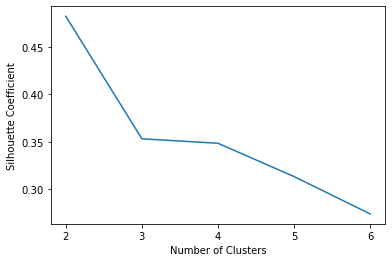

In [1271]:
#plotting silhouette score for different centroids
plt.plot(range(2, 7), silhouette_coefficients)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [1272]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0
2,8,70,18.0,318.0,150.0,3436,11.0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0


In [1273]:
#viewing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

0    105
1    293
Name: cluster_K, dtype: int64

In [1274]:
#attaching the clusters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,0
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,0
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,0
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,0
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,0


In [1275]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
cluster_K,,,,,,,,
0,7.923810,73.742857,14.851429,341.809524,158.000000,4093.771429,12.867619,105
1,4.569966,76.822526,26.619113,140.250853,85.061433,2567.860068,16.535836,293


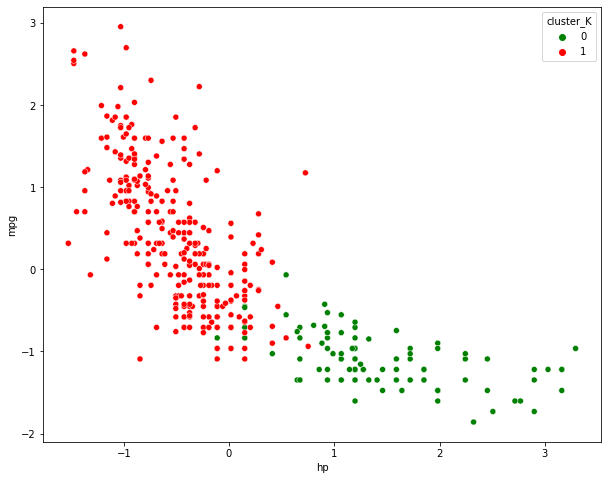

In [1276]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="hp", y="mpg", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','red']);

In [1277]:
#Clearly shows two disting group with a difference in average between the clusters and variables

In [1278]:
#Hierarchical clustering

#separating numeric variables
cc = df3.iloc[:,0:7] 
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,8,70,18.0,307.0,130.0,3504,12.0
1,8,70,15.0,350.0,165.0,3693,11.5
2,8,70,18.0,318.0,150.0,3436,11.0
3,8,70,16.0,304.0,150.0,3433,12.0
4,8,70,17.0,302.0,140.0,3449,10.5


In [1279]:
#scaling the variable
scaled_data = cc.apply(stats.zscore)
scaled_data.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [1280]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(scaled_data, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaled_data))
c

0.788297546237694

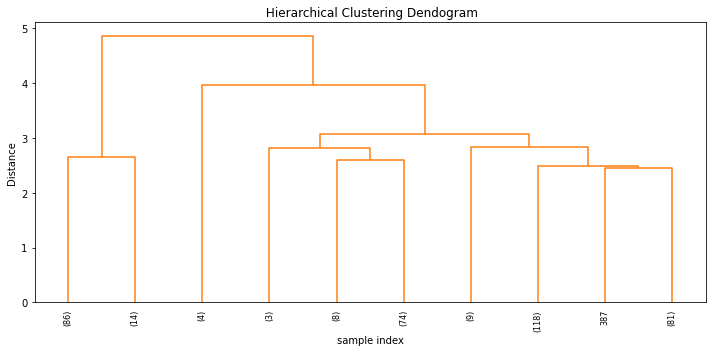

In [1281]:
plt.figure(figsize=(10, 5))
plt.title(' Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8., truncate_mode='lastp', 
    p=10   )
plt.tight_layout()

In [1282]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(scaled_data, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(scaled_data))

c

0.7497773068471122

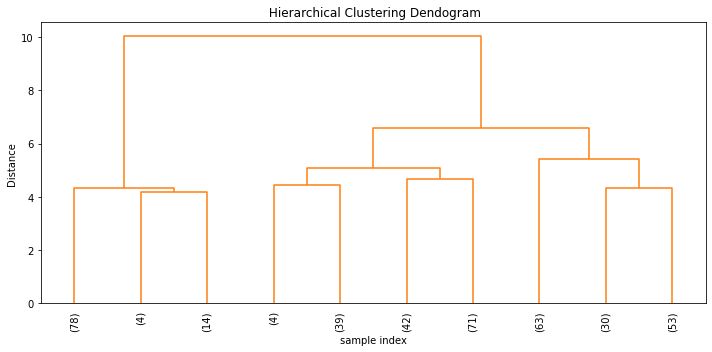

In [1283]:
plt.figure(figsize=(10, 5))
plt.title(' Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10., truncate_mode='lastp', 
    p=10   )
plt.tight_layout()

In [1284]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(scaled_data, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(scaled_data))

c

0.7703378534469295

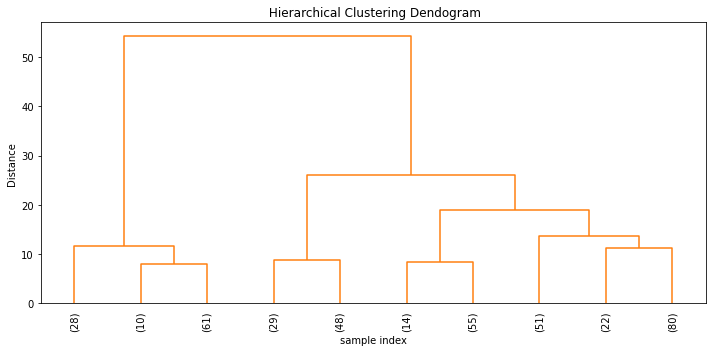

In [1285]:
plt.figure(figsize=(10, 5))
plt.title(' Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. , truncate_mode='lastp', 
    p=10  )
plt.tight_layout()

In [1286]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(scaled_data, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(scaled_data))

c

0.7845034072267035

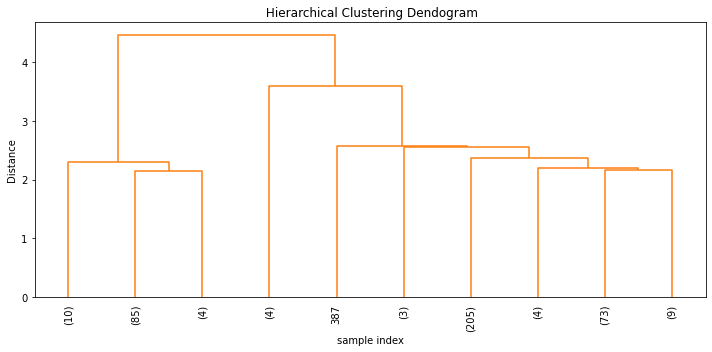

In [1287]:
plt.figure(figsize=(10, 5))
plt.title(' Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10., truncate_mode='lastp', 
    p=10  )
plt.tight_layout()

In [1288]:
#calculating pairwise distance using average linkage method
link_method = linkage(scaled_data.iloc[:,0:7], method = 'average')



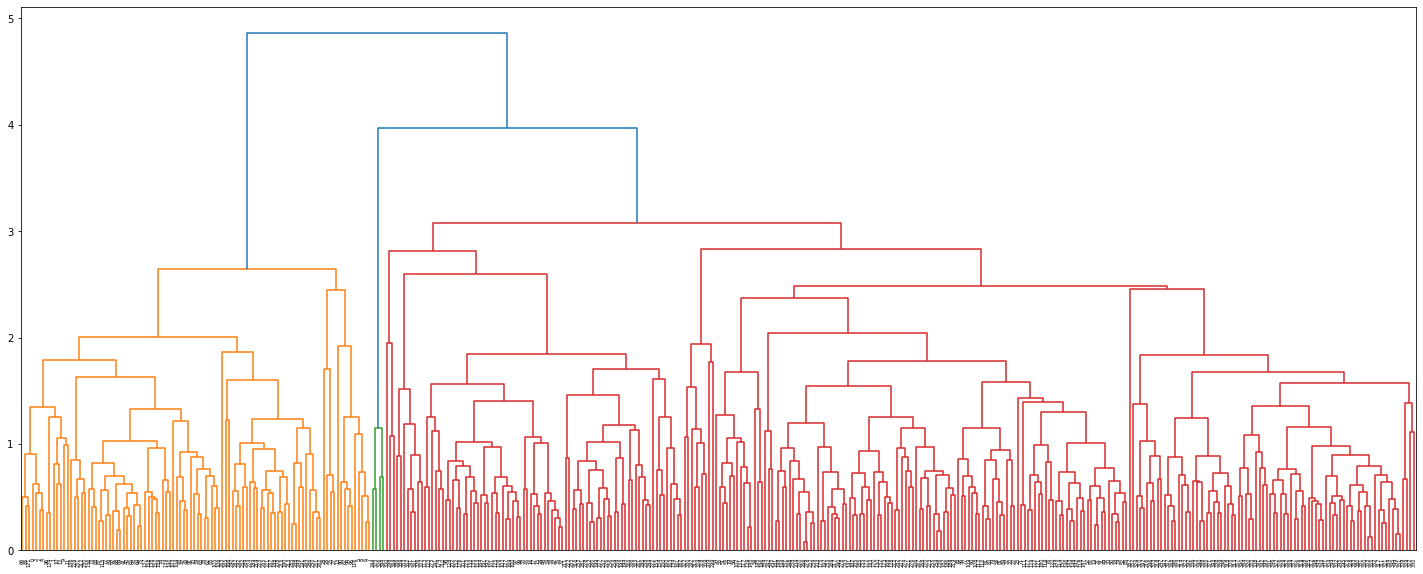

In [1289]:
#plotting the H-cluster
plt.figure(figsize=(25, 10))
dendrogram(link_method)
plt.show()

In [1290]:
#viewing the clusters formed
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [1291]:
#attaching the clusters formed to the scales data
scaled_data['clusters_H'] = clusters
scaled_data.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,1
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,1
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,1
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,1
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,1


In [1292]:
#vieweing the distribution of clusters
scaled_data.clusters_H.value_counts().sort_index()

1    100
2    298
Name: clusters_H, dtype: int64

In [1293]:
#attaching the clusters formed to the original data
cc['clusters_H']=clusters
carH['clusters_H']=clusters
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [1294]:
#create a new data set named Hcluster
Hcluster=cc
Hcluster.head()

,cyl,yr,mpg,disp,hp,wt,acc,clusters_H
0,8,70,18.0,307.0,130.0,3504,12.0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1
2,8,70,18.0,318.0,150.0,3436,11.0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1


In [1295]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('clusters_H').mean()
aggdata['Freq']=cc.clusters_H.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
clusters_H,,,,,,,,
1,7.980000,73.740000,14.684000,345.470000,160.400000,4121.560000,12.702000,100
2,4.607383,76.771812,26.477852,142.404362,85.479866,2584.137584,16.529866,298


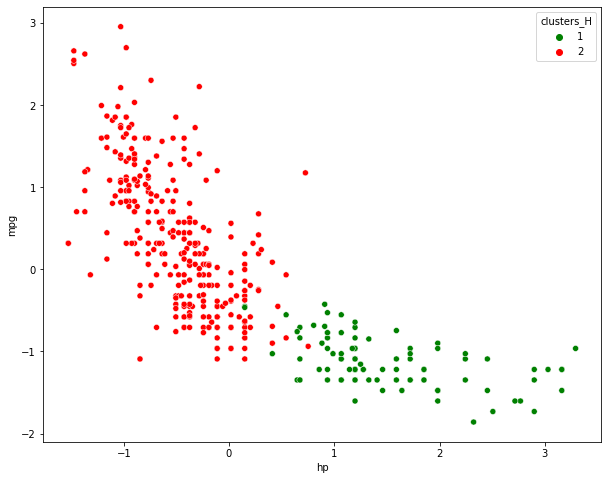

In [1296]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="hp", y="mpg", hue="clusters_H",
              data=scaled_data, 
                    palette=['green','red']);

In [1297]:
#Clearly shows two disting group with a difference in average between the clusters and variables

In [1298]:
#Share your insights about the difference in using these two methods.

#1) Optimal number of cluster in K-means is 2 and in Hierachical clustering is optimal size of cluster is 2
#2) Optimal number of clusters in k-means we can find using elbow method and in Hierachical clustering we can find using either dendogram

#and in Hierachical clustering evaluation happended using cophenet index
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering  cophenet index = 0.80 is near to 1 .

In [1299]:
#Answer below questions based on outcomes of using ML based methods.
#Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

#1) Optimal number of cluster in K-means is 2 and in Hierachical clustering is optimal size of cluster is 2
#2) Optimal number of clusters in k-means we can find using elbow method and in Hierachical clustering we can find using either pair plot or dendogram
#3) In k-means evaluation using  Silhouette Score  is 0 − Score 0 indicates that the sample is 
# on or very close to the decision boundary between two neighboring clusters
#and in Hirachical clustering evaluation happended using cophenet index
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering  cophenet index = 0.78 is near to 1 .

In [1300]:
#Use linear regression model on different clusters separately and print the coefficients of the models individually
#renaming the cluster labels to light and heavy vehicles and creating dummy variables of it
carK['cluster_K']=carK['cluster_K'].astype('category')
carK['cluster_K'] = carK['cluster_K'].replace({1: 'heavy', 0: 'light'})
carK = pd.get_dummies(carK, columns=['cluster_K'])
carK.head()

,cyl,yr,mpg,disp,hp,wt,acc,origin_America,origin_Asia,origin_Europe,mpg_level_high,mpg_level_low,mpg_level_medium,cluster_K_heavy,cluster_K_light
0,8,70,18.0,307.0,130.0,3504,12.0,1,0,0,0,0,1,0,1
1,8,70,15.0,350.0,165.0,3693,11.5,1,0,0,0,1,0,0,1
2,8,70,18.0,318.0,150.0,3436,11.0,1,0,0,0,0,1,0,1
3,8,70,16.0,304.0,150.0,3433,12.0,1,0,0,0,1,0,0,1
4,8,70,17.0,302.0,140.0,3449,10.5,1,0,0,0,0,1,0,1


In [1301]:
X = carK.drop(['mpg','origin_Europe','mpg_level_low','cluster_K_light'], axis=1)
# the dependent variable
y = carK[['mpg']]

In [1302]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [1303]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1304]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.1945995644777516
The coefficient for yr is 0.4318651041505963
The coefficient for disp is 0.01747749627910993
The coefficient for hp is -0.010138045835905933
The coefficient for wt is -0.004068430169386367
The coefficient for acc is 0.18564828746250203
The coefficient for origin_America is -1.6918315494304115
The coefficient for origin_Asia is -0.7407779192303066
The coefficient for mpg_level_high is 9.283120939156877
The coefficient for mpg_level_medium is 2.25000171423125
The coefficient for cluster_K_heavy is -2.511514014338476


In [1305]:
regression_model.score(X_train, y_train)

0.8942370456543635

In [1306]:
K=regression_model.score(X_test, y_test)
K

0.911789380805238

In [1307]:
#Linear regression on data with H-clusters

In [1308]:
#renaming the cluster labels to light and heavy vehicles and creating dummy variable of it
carH['clusters_H']=carH['clusters_H'].astype('category')
carH['clusters_H'] = carH['clusters_H'].replace({1: 'heavy', 2: 'light'})
carH = pd.get_dummies(carH, columns=['clusters_H'])

In [1309]:
X = carH.drop(['mpg','origin_Europe','mpg_level_low','clusters_H_light'], axis=1)
# the dependent variable
y = carH[['mpg']]

In [1310]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [1311]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [1312]:
regression_model.score(X_train, y_train)

0.8988409890950728

In [1313]:
H=regression_model.score(X_test, y_test)
H

0.9010238373846721

In [1314]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -1.0104832432575335
The coefficient for yr is 0.44754173575501655
The coefficient for disp is 0.015115200524614444
The coefficient for hp is -0.013301584387234172
The coefficient for wt is -0.004264179780672559
The coefficient for acc is 0.11805139164484754
The coefficient for origin_America is -2.1174569315391065
The coefficient for origin_Asia is -1.3974915348558097
The coefficient for mpg_level_high is 8.56594823929828
The coefficient for mpg_level_medium is 1.65772506985828
The coefficient for clusters_H_heavy is 2.0389744688074076


In [1315]:
#How using different models for different clusters will be helpful in this case and how it will be different than using one single model without
#clustering? Mention how it impacts performance and prediction.
modellists = []
modellists.append(['Linear Regression with K means clusters', K*100])
modellists.append(['Linear Regression with Heirarchical clusters', H*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Regression on Test'])
mdl_df

,Model,Regression on Test
0,Linear Regression with K means clusters,91.178938
1,Linear Regression with Heirarchical clusters,90.102384


In [1316]:
#K-means appears to explain the highest variation in the datset, but with a difference of only 1% when compared with Heirachical model,

In [1317]:
#Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform
#a better data analysis.

# 1) Volume: Data volume can be increased. It's better for analysis.
# 2) Value: Outeliers are present. Noise should be less while collecting "hp" data. 
# 3) Quantity is ok.
# 4) Varity - Car model, price can be added
# 5) Quality- is ok.
# 6) Veracity should required less noise in dataset.

In [1318]:
#-----------------------------------------------PART2 ----------------------------------------------------------------------
#Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

#importing the dataset
wi=pd.ExcelFile('Part2 - Company.xlsx',engine='openpyxl')
wi.sheet_names
wi = wi.parse("Sheet1")
wi.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [1319]:
#Shape of dataset
wi.shape

(61, 5)

In [1320]:
#make a copy of the data
wi1=wi.copy()

In [1321]:
#dropping the target variable
wi=wi.drop('Quality',axis=1)

In [1322]:
#checking for data types
print('The data type of each attribute: \n')
wi1.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [1323]:
print('The Target Variable  missing values \n')
wi1.isnull().sum()

The Target Variable  missing values 



A           0
B           0
C           0
D           0
Quality    18
dtype: int64

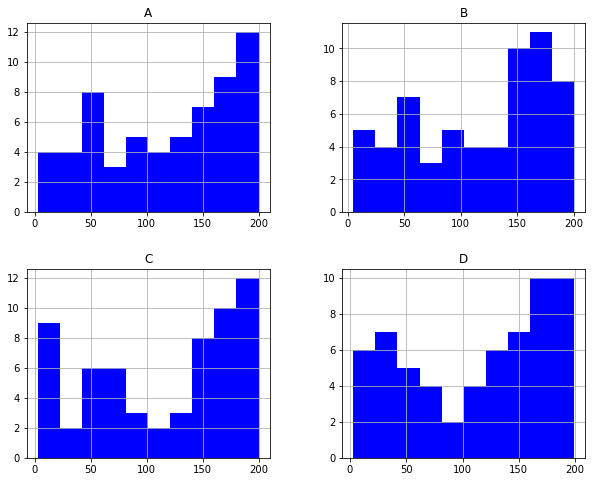

In [1324]:
#checking the distribution of the data points
wi.hist(bins = 10, figsize = (10, 8), color = 'blue')
plt.show()

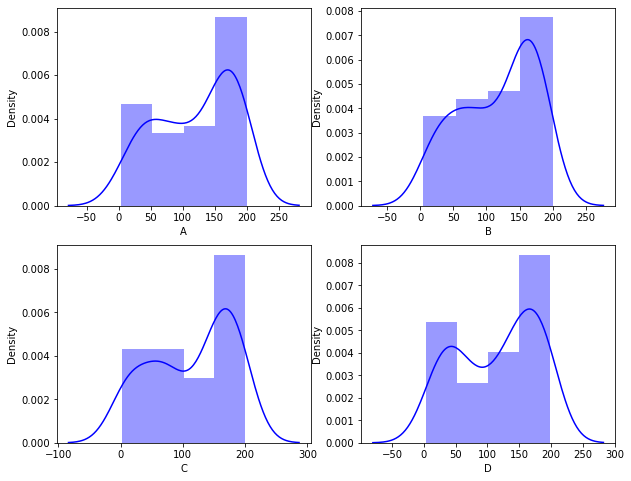

In [1325]:
#checking for the density of the variable
plt.figure(figsize=(10, 8))
col = 1
for i in wi.columns:
    plt.subplot(2, 2, col)
    sns.distplot(wi[i], color = 'b')
    col += 1 

In [1326]:
#scaling the numeric variables
w1  = wi.apply(stats.zscore)
w1.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [1327]:
#checking for the distribution of the target variables
wi1['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [1328]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(w1)
labels = k_means.labels_

In [1329]:
#attaching the cluster labels to the original dataset
wi1["Quality_k"] = labels

In [1330]:
#checking for the first 15 observations
wi1.head(15)

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [1331]:
#renaming the cluster labels
wi1['Quality_k'] = wi1['Quality_k'].replace({0: 'Quality A', 1: 'Quality B'})

In [1332]:
#checking for datatypes
wi1.dtypes

A             int64
B             int64
C             int64
D             int64
Quality      object
Quality_k    object
dtype: object

In [1333]:
wi1.isnull().sum()

A             0
B             0
C             0
D             0
Quality      18
Quality_k     0
dtype: int64

In [1334]:
#dropping na rows
company_new=wi1.dropna()

In [1335]:
#checking for the shape
company_new.shape

(43, 6)

In [1336]:
#using the cluster labels and actual target labels to check for accuracy
pred = company_new['Quality_k']
actual=company_new['Quality']

In [1337]:
company_new.head(15)

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
6,34,28,78,22,Quality A,Quality A
8,160,181,194,178,Quality B,Quality B
10,76,94,107,37,Quality A,Quality A
11,138,200,153,192,Quality B,Quality B
12,27,106,57,37,Quality A,Quality A
13,45,76,56,57,Quality A,Quality A


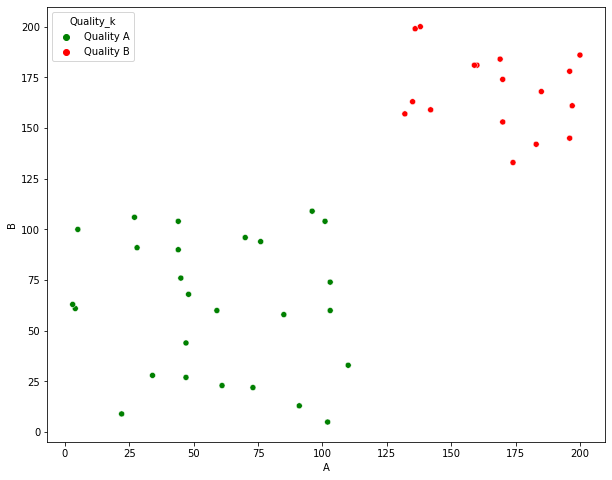

In [1338]:
#plotting the clusters formed
plt.figure(figsize=(10, 8))
sns.scatterplot(x="A", y="B", hue="Quality_k",
              data=company_new, 
                    palette=['green','red']);

In [1339]:
#Save new dataset in xls file for futher analysis
company_new.to_excel('company_new.xlsx', index = False)

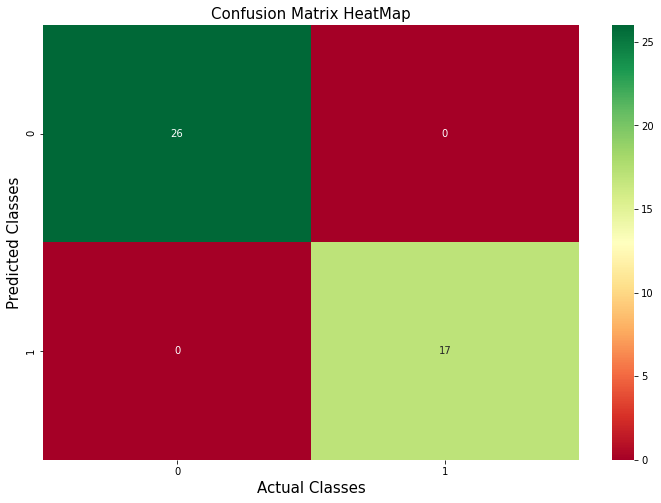

In [1340]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(actual, pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

In [1341]:
#There appears to be no misclassification when checking the it with the non missing target 
#variables and the predicted clusters, Hence the new labels can be used as a target variable

In [1342]:
#-----------------------------------------------PART3------------------------------------------------------------------------


In [1343]:
#Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
#model using just the raw data.

#Import, clean and pre-process the data

In [1344]:
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support

In [1345]:
vehicle_df = pd.read_csv('Part3 - vehicle.csv')

In [1346]:
vehicle_df.shape

(846, 19)

In [1347]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [1348]:
#replacing the missing values with median values
for cols in vehicle_df.columns:
    if(cols != 'class'): 
        vehicle_df[cols] = vehicle_df[cols].fillna(vehicle_df[cols].median())

In [1349]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [1350]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [1351]:
#multivariate analysis
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


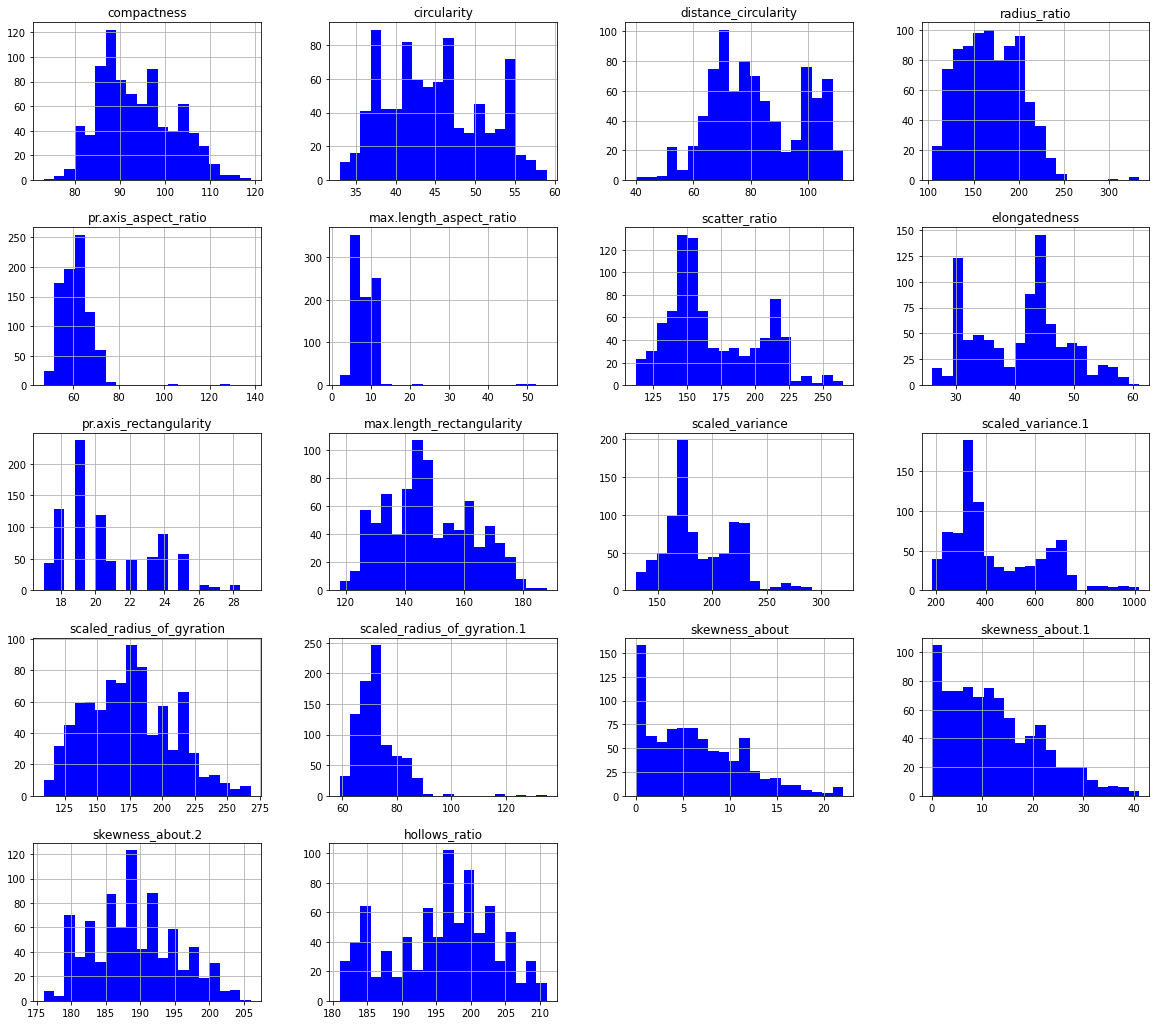

In [1352]:
#plotting the distribution of the numerical variables
##multivariate analysis
vehicle_df.hist(bins = 20, figsize = (20, 18), color = 'blue')
plt.show()

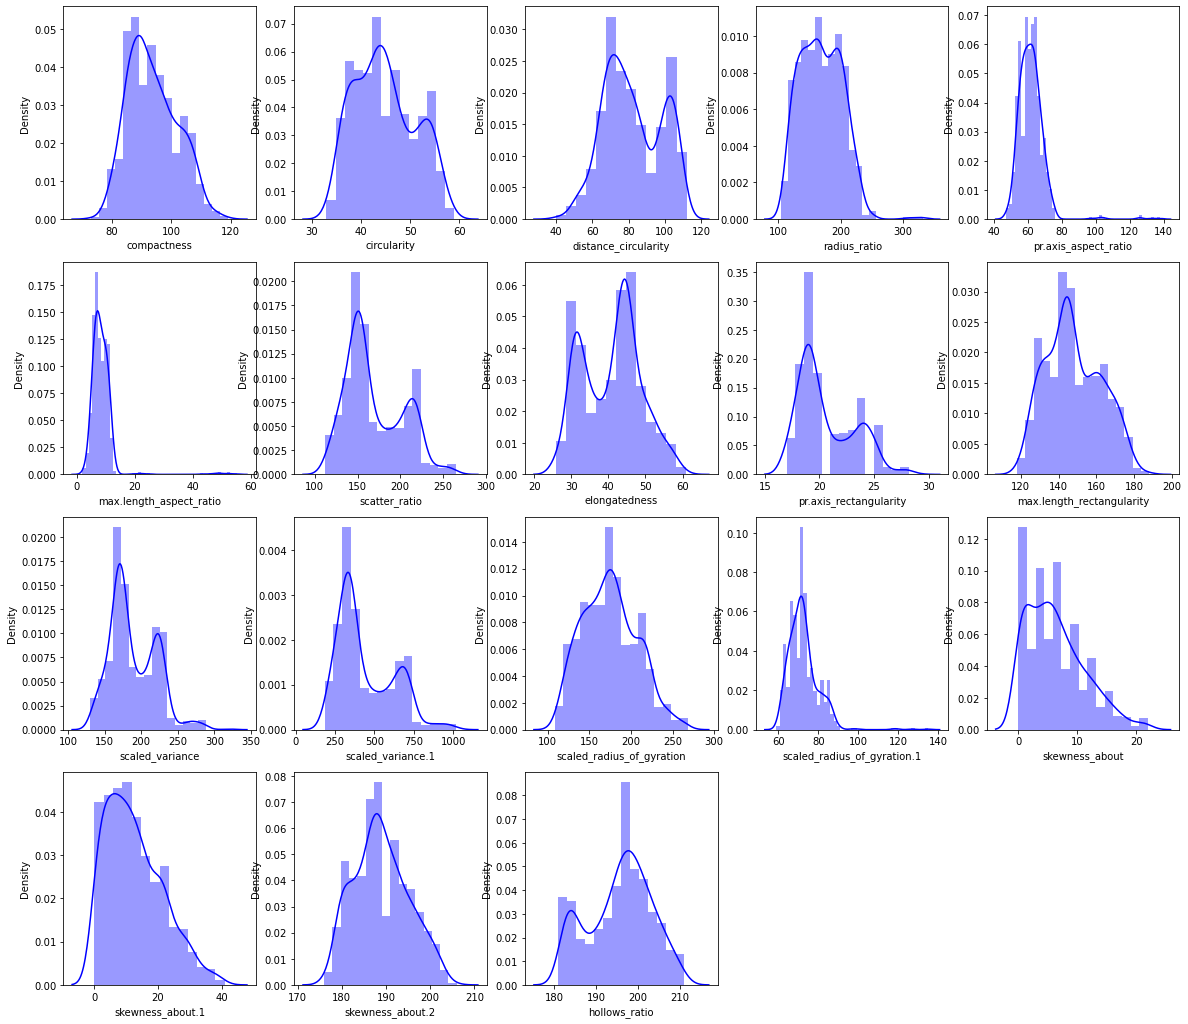

In [1353]:
#Density plots
##multivariate analysis
plt.figure(figsize=(20, 18))
col = 1
for i in vehicle_df.drop(columns='class').columns:
    plt.subplot(4, 5, col)
    sns.distplot(vehicle_df[i], color = 'b')
    col += 1 

In [1354]:
#Columns have data distributed across multiple scales.
#Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness Column skweness_about, skewness_about.
#1 have data that is right skewed whereas for column skewness_about.
#2 data is nearly normally distributed. Some columns have long right tail  pr.axis_aspect_ratio as evident from the above distplot it is highly likely that they will have outliers.

car    429
bus    218
van    199
Name: class, dtype: int64


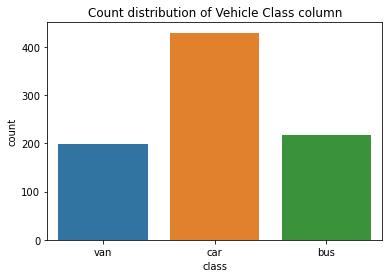

In [1355]:
#checking the distribution of the class variable
print(vehicle_df['class'].value_counts())
plt.title('Count distribution of Vehicle Class column')
sns.countplot(x = 'class', data = vehicle_df);

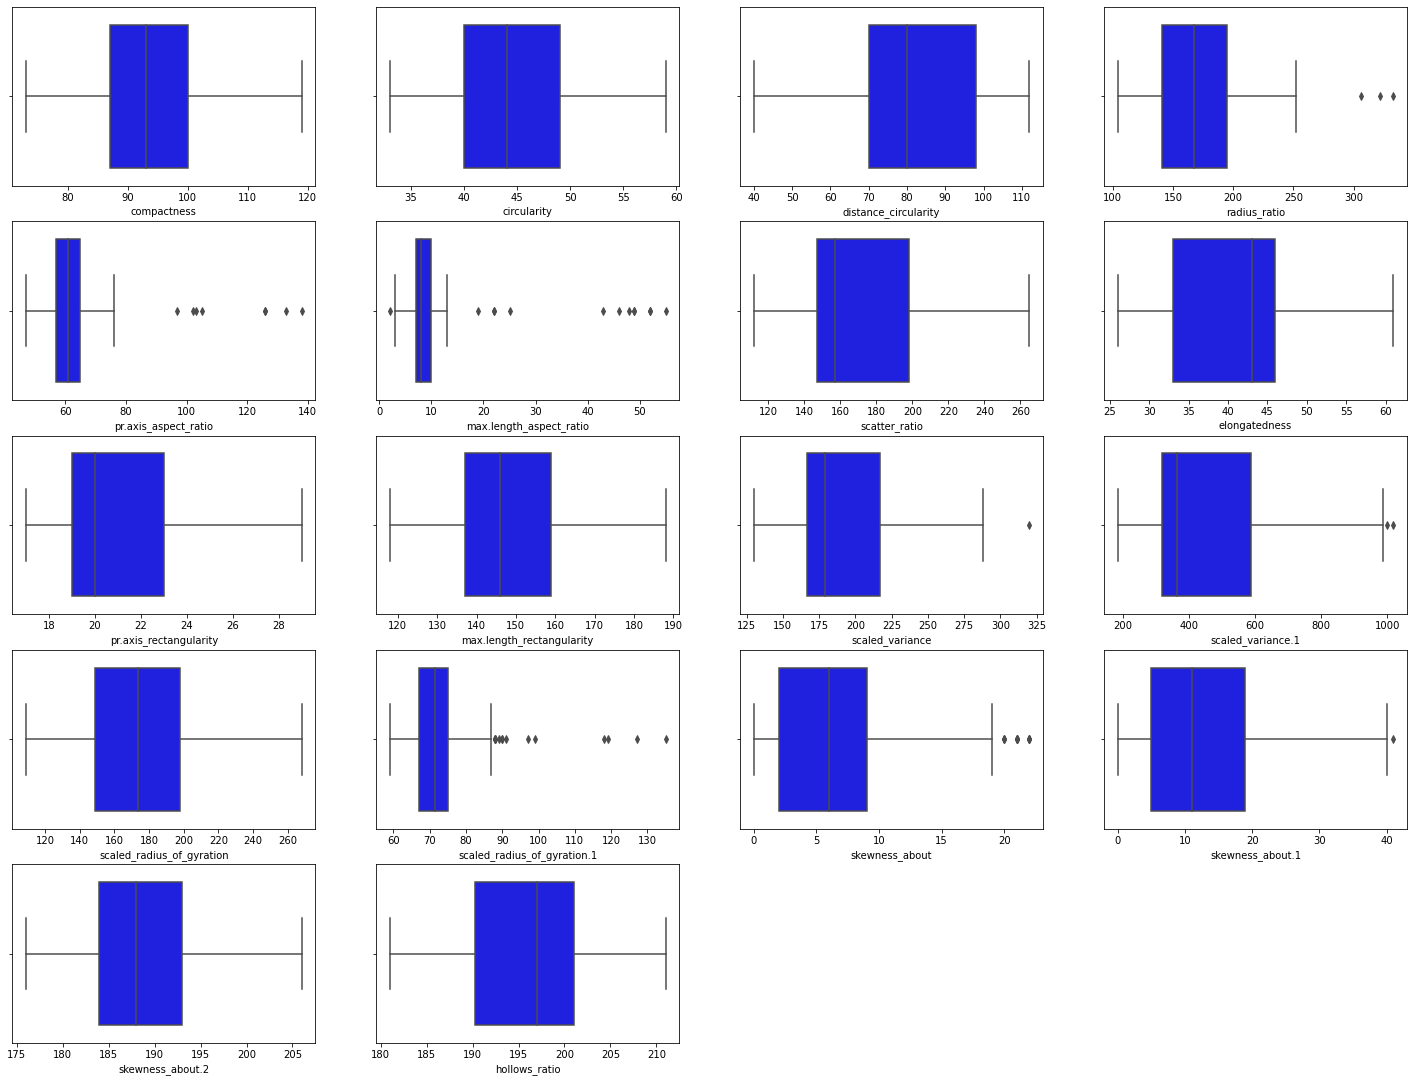

In [1356]:
#boxplots for outliers
plt.figure(figsize=(25,23))
col = 1
for i in vehicle_df.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(vehicle_df[i],color='blue')
    col += 1

In [1357]:
#Above Boxplots it interpretes that there are outliers in 8 different columns., will have them treated eventually

In [1358]:
#find the outliers and replace them by median
for col_name in vehicle_df.drop(columns = 'class').columns:
    q1 = vehicle_df[col_name].quantile(0.25)
    q3 = vehicle_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    vehicle_df.loc[(vehicle_df[col_name] < low) | (vehicle_df[col_name] > high), col_name] = vehicle_df[col_name].median()

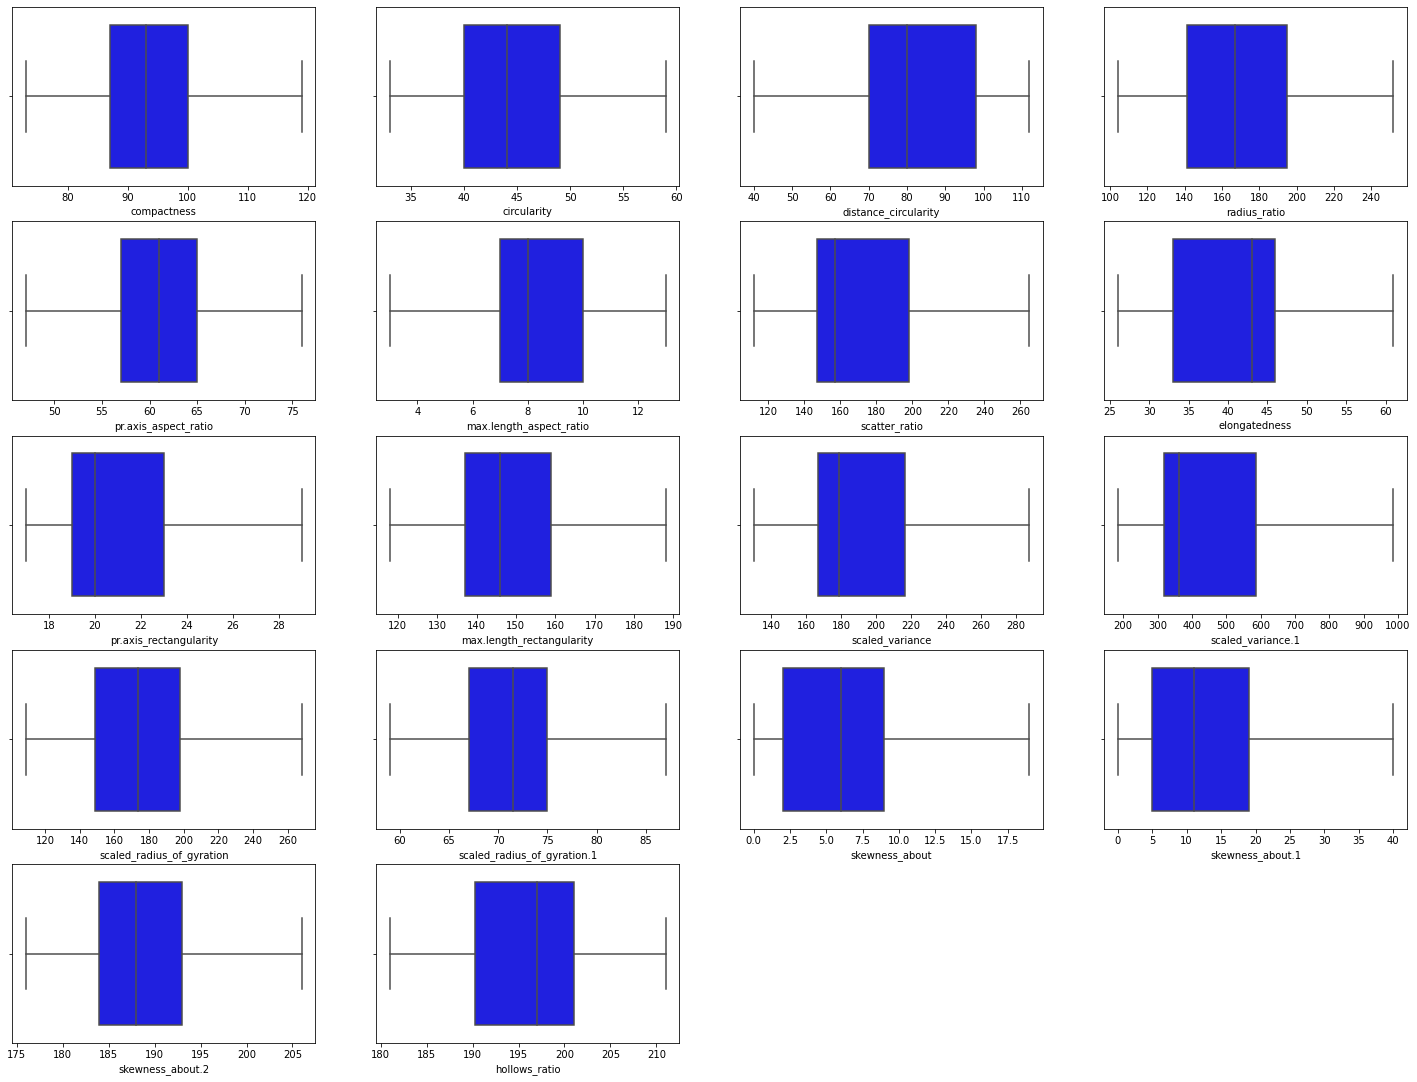

In [1359]:
#boxplot after outlier treatment
plt.figure(figsize=(25,23))
col = 1
for i in vehicle_df.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(vehicle_df[i],color='blue')
    col += 1

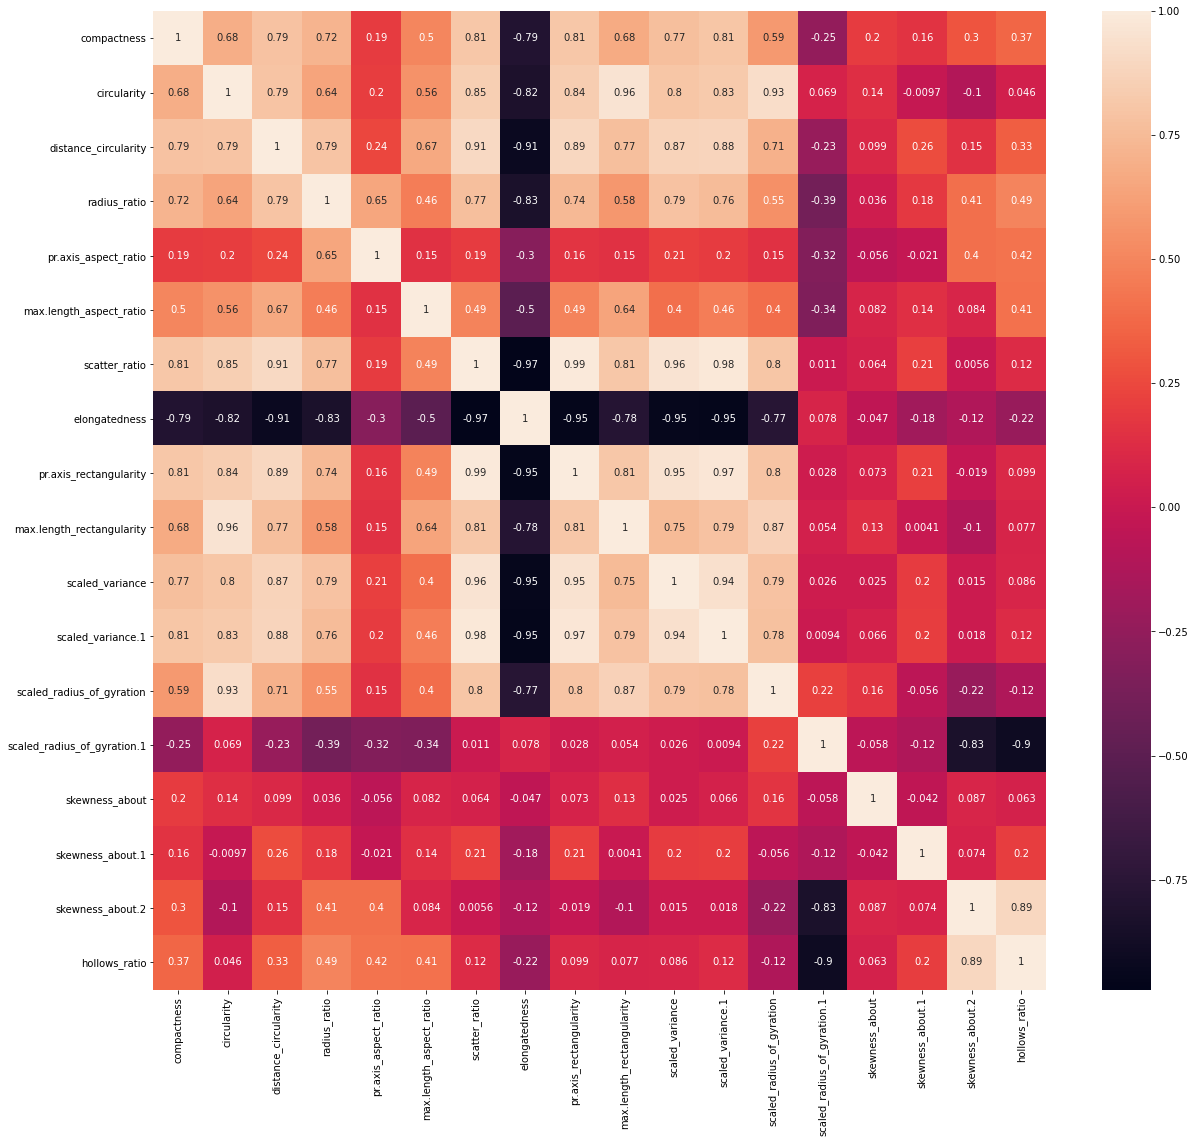

In [1360]:
#checking for correlation
plt.figure(figsize=(20,18))
corr=vehicle_df.corr()
sns.heatmap(corr,annot=True);

In [1361]:
#Each square shows the correlation between the variables on each axis. 
#Correlation ranges from -1 to +1. 
#Values closer to zero means there is no linear trend between the two variables.
#The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship

In [1362]:
#spliiting the data to check for correlation with the class variable
X = vehicle_df.loc[:, vehicle_df.columns != 'class']
y = vehicle_df['class'].astype('category').cat.codes

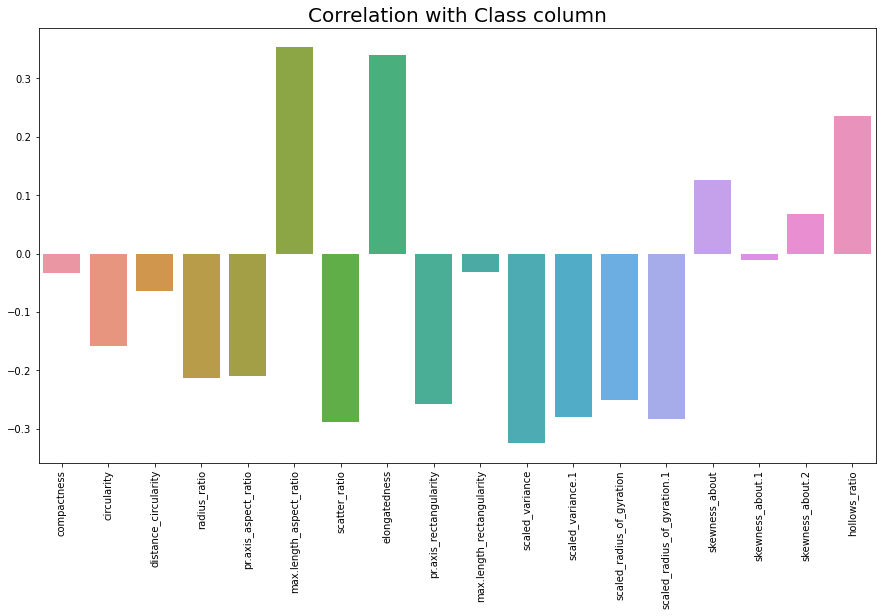

In [1363]:
#plotting the correlation with target variable
plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

In [1364]:
#PCA
#scaling the numeric variables
XScaled=X.apply(stats.zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


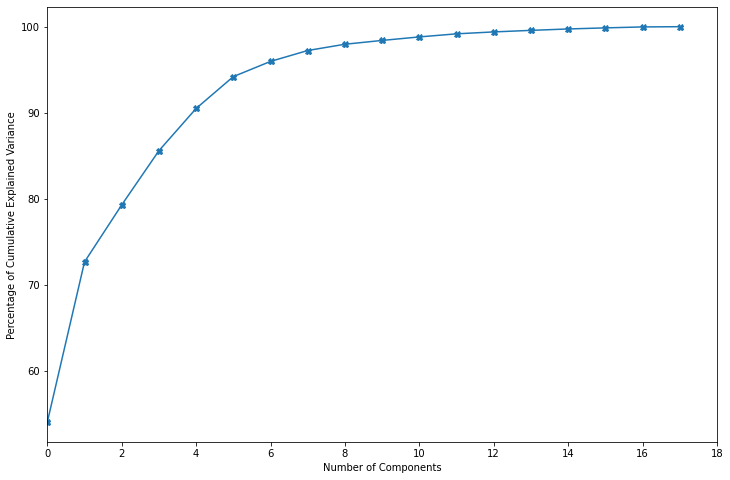

In [1365]:
#plotting the cummulative variance explained by the principal components
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [1366]:
print(pca.explained_variance_)

[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


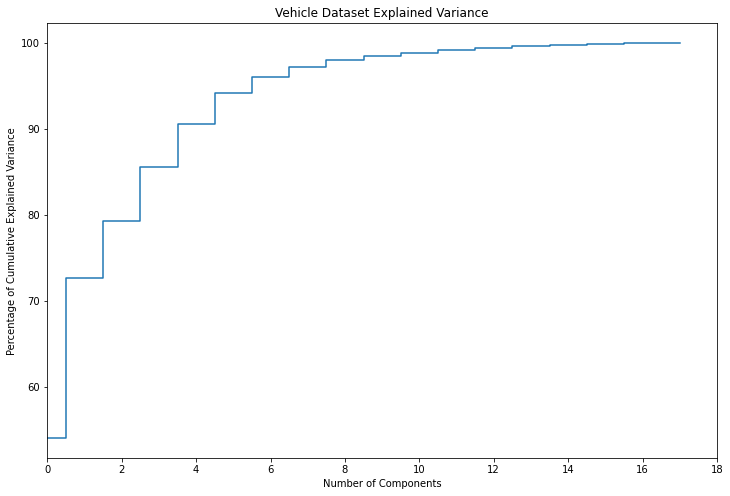

In [1367]:
#plotting the
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

In [1368]:
#We can see that the first six components explain more than 95% of variation.
#Between first 5 components, more than 91% of the information is captured.
#The above plot shows almost 95% variance by the first 6 components.
#Therefore we can drop 7th component onwards.

In [1369]:
#perform dimensional reduction on the data
#Using 6 components and printing the eigen vectors
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.07907345  0.08164

In [1370]:
#printing the original features and the reduced features
pca_6components = PCA(n_components = 6)
X_pca = pca_6components.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 6


In [1371]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5
0,0.584228,-0.675673,-0.453334,-0.750656,-0.777515,-1.848809
1,-1.512180,-0.348934,-0.333436,1.268953,-0.324929,-0.118317
2,3.913448,0.234507,-1.265094,0.137224,0.915751,-0.685594
3,-1.535193,-3.044413,-0.469623,0.324317,-0.611590,0.367777
4,-0.642062,1.488882,-0.246288,-0.550939,0.471655,-1.012698


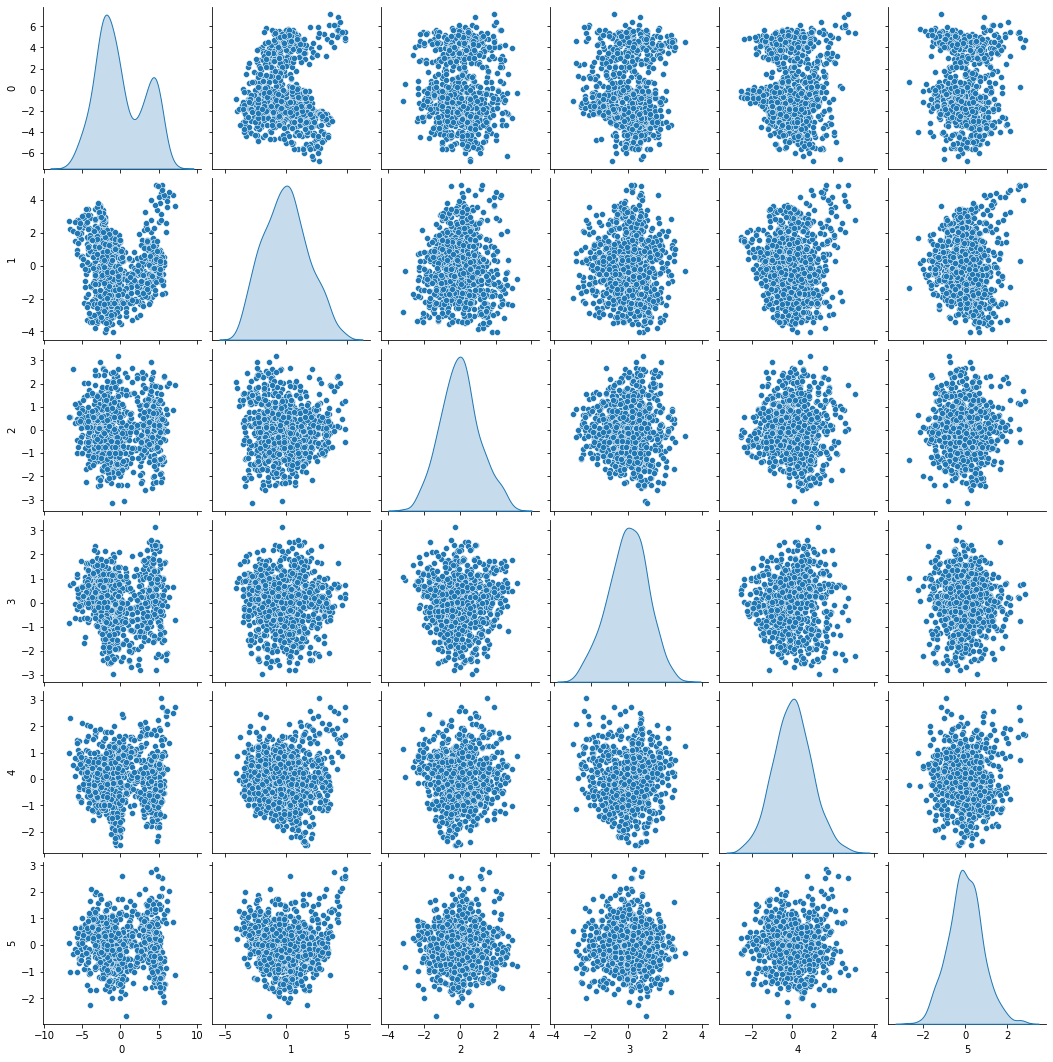

In [1372]:
#pairplot
sns.pairplot(pca_df, diag_kind = 'kde');

In [1373]:
#SVM
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)

In [1374]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 18 columns.


In [1375]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 18 columns.


In [1376]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)

In [1377]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 6 columns.


In [1378]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 6 columns.


In [1379]:
# Building a Support Vector Machine on train data
#Design and train a best fit SVM classier using all the data attributes
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [1380]:
#predicting on train data
sv_train_predict = svc_model.predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9899



In [1381]:
#predicting on test data
sv_test_predict = svc_model.predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9685



In [1382]:
#printing classification report
print("Classification Report\n")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [1383]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.96
Recall Score : 0.97
F1-Score: 0.97
Accuracy Score : 0.97


In [1384]:
#Design and train a best fit SVM classier using dimensionally reduced attributes.
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [1385]:
#predicting on train data
sv_tr_predict = svc_model_pca.predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 0.9476



In [1386]:
#predicting on test data
sv_te_predict = svc_model_pca.predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9213



In [1387]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.94      0.91      0.93       125
           2       0.84      0.91      0.88        58

    accuracy                           0.92       254
   macro avg       0.91      0.92      0.92       254
weighted avg       0.92      0.92      0.92       254



In [1388]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.91
Recall Score : 0.92
F1-Score: 0.92
Accuracy Score : 0.92


In [1389]:
# Report with SVC with and without PCA
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,96.850394,97.047758,96.227745,96.596702
1,Support Vector Classifier with PCA,92.125984,92.315169,91.352049,91.773898


In [1390]:
#Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

# Both the model give more than 90% accuracy on the test data,
# PCA used only 6 attributes to come up with an accuracy of 90%
# where as the model without pca used all the attributes to come up with more than 90% accuracy,
# As accuracy is almost same with 6 attributes and 18 attributes need to do use PCA for data analysis,
# as it decreased requirement of capacity and memory and increased efficiency given the processes taking place 
# in smaller dimensions.
#improves visualization and concentrate on the important attributes required for prediction

In [1391]:
#---------------------------------------------- PART4 -------------------------------------------------------------------------
#Goal is to build a data driven batsman ranking model for the sports management company to make business decisions

In [1392]:
#importing the data
bb_df=pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
bb_df=bb_df.dropna(axis=0)
bb_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [1393]:
#EDA
# Dataset contains 90 rows and 7 columns
bb_df.shape

(90, 7)

In [1394]:
#checking for the data type
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [1395]:
#multivariate analysis
bb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


In [1396]:
#Is any missing value
bb_df.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

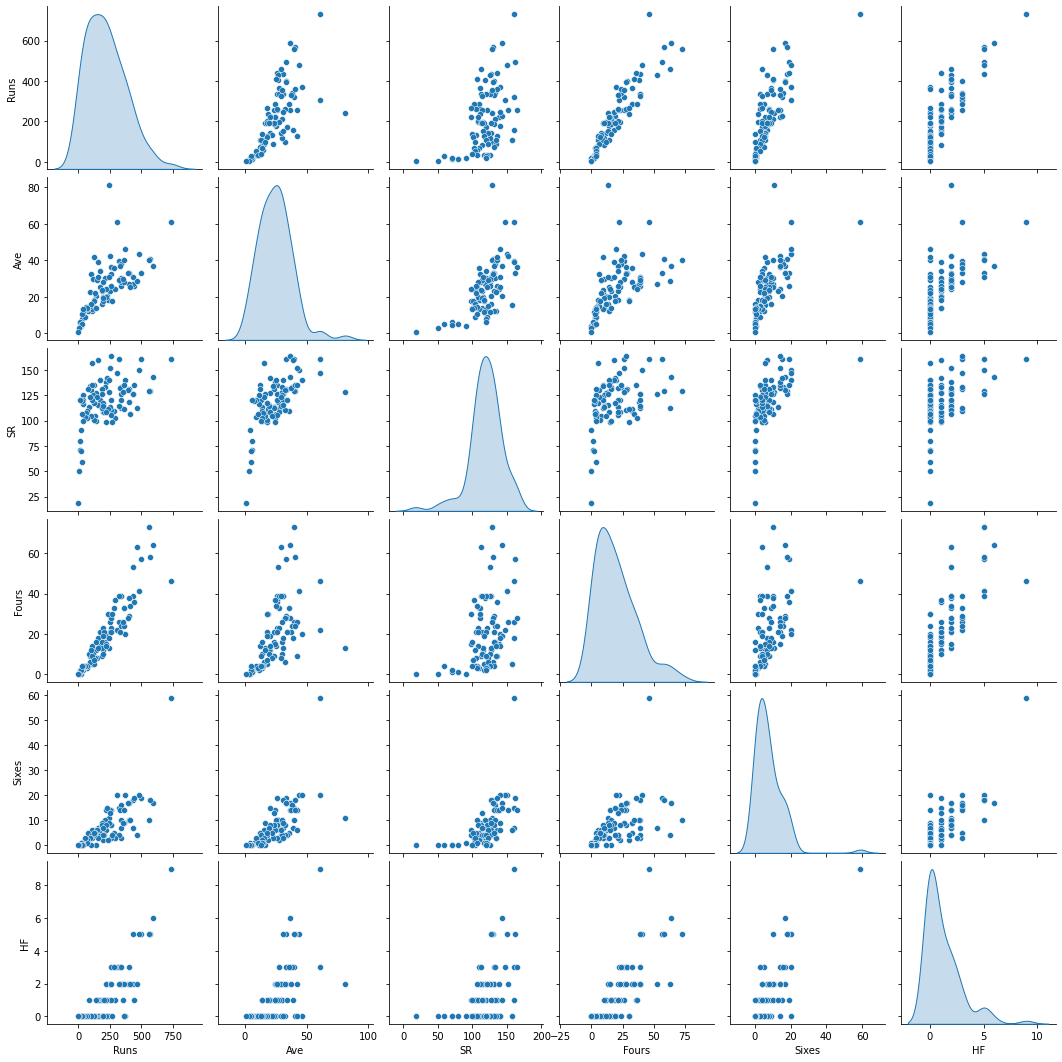

In [1397]:
#pairplot
#multivariate analysis
sns.pairplot(bb_df, diag_kind = 'kde');

<AxesSubplot:xlabel='Runs'>

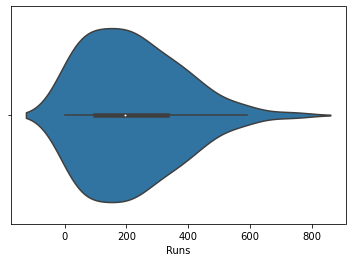

In [1398]:
#univariate analysis
sns.violinplot(bb_df['Runs']) 

<AxesSubplot:xlabel='Fours'>

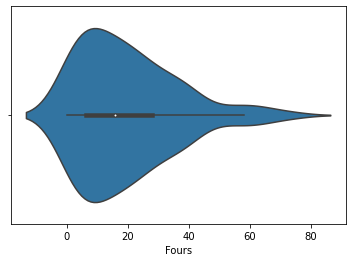

In [1399]:
sns.violinplot(bb_df['Fours']) 

<AxesSubplot:xlabel='Sixes'>

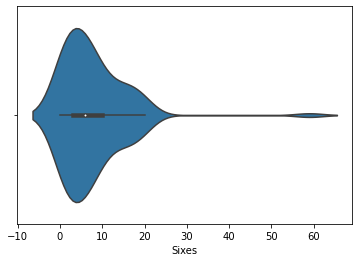

In [1400]:
sns.violinplot(bb_df['Sixes']) 

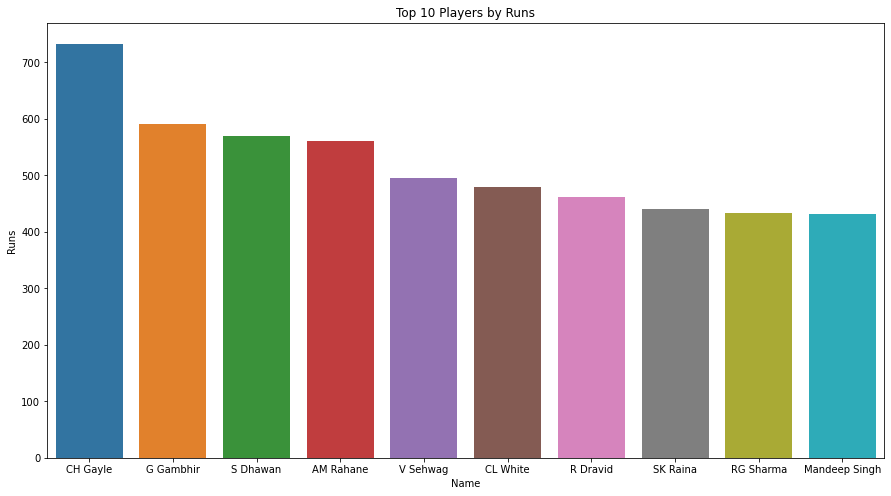

In [1401]:
#visualisation
#bi-variate
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

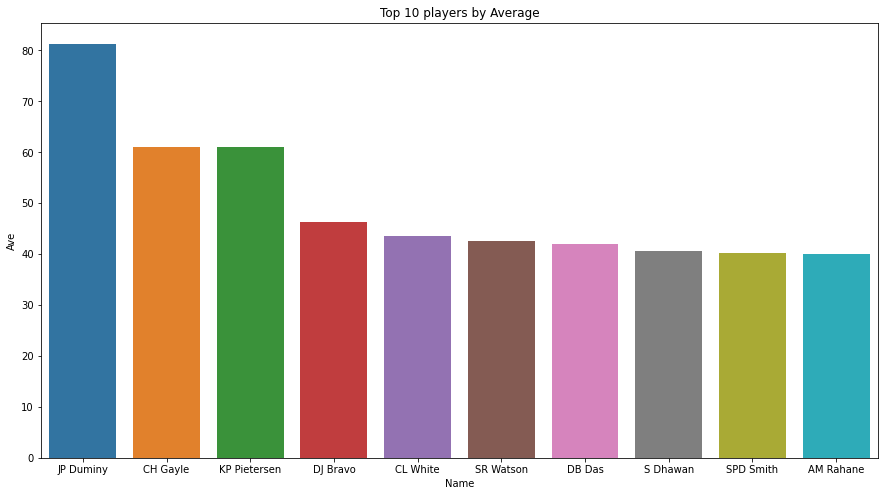

In [1402]:
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

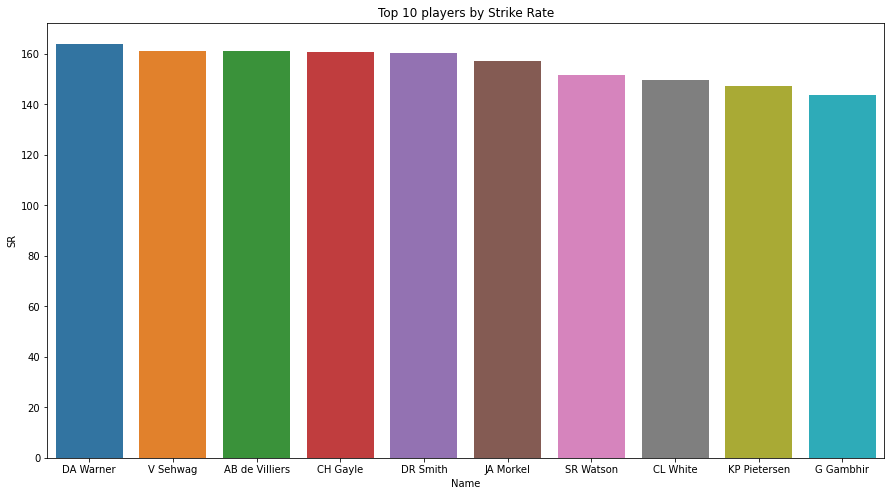

In [1403]:
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

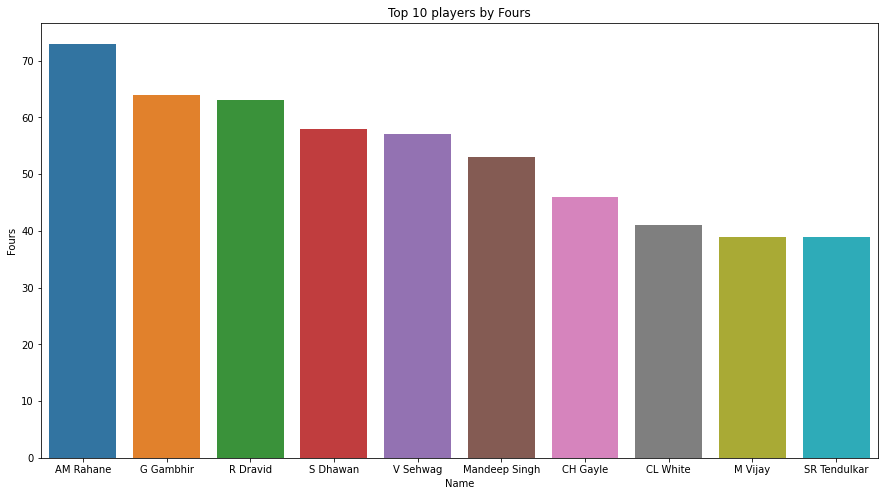

In [1404]:
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Fours']
sns.barplot(data= b1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

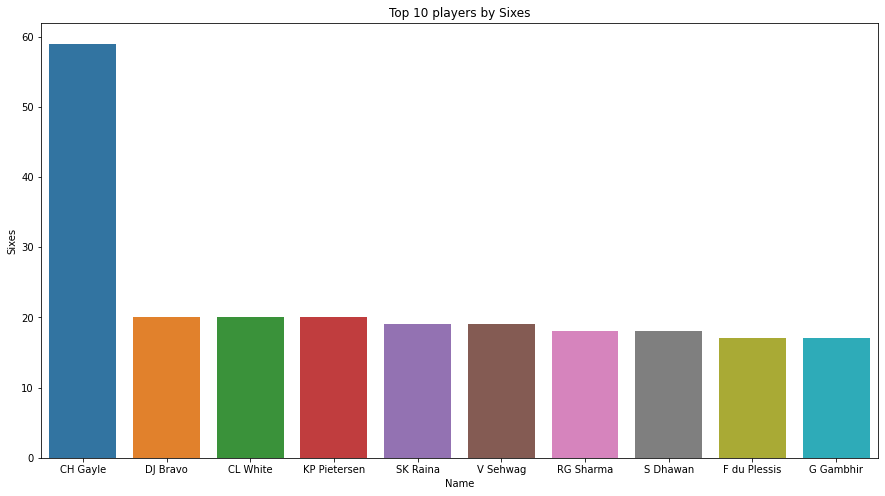

In [1405]:
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

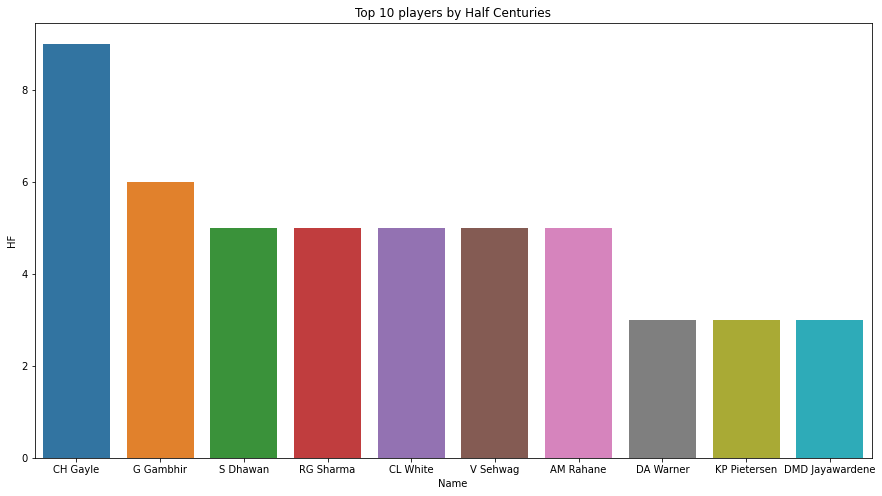

In [1406]:
plt.figure(figsize=(15,8))
b1=bb_df.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'HF']
sns.barplot(data= b1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

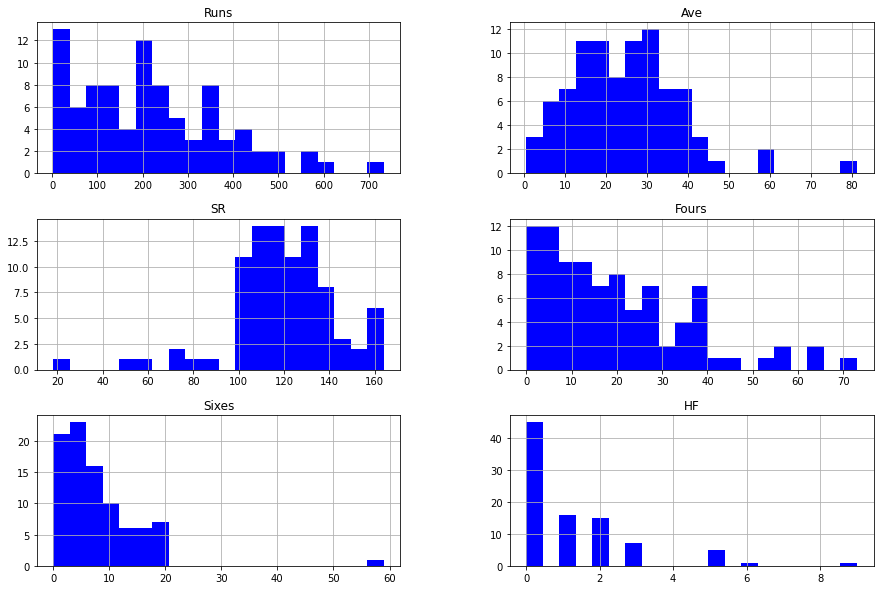

In [1407]:
#Multivariate Data Analysis
bb_df.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

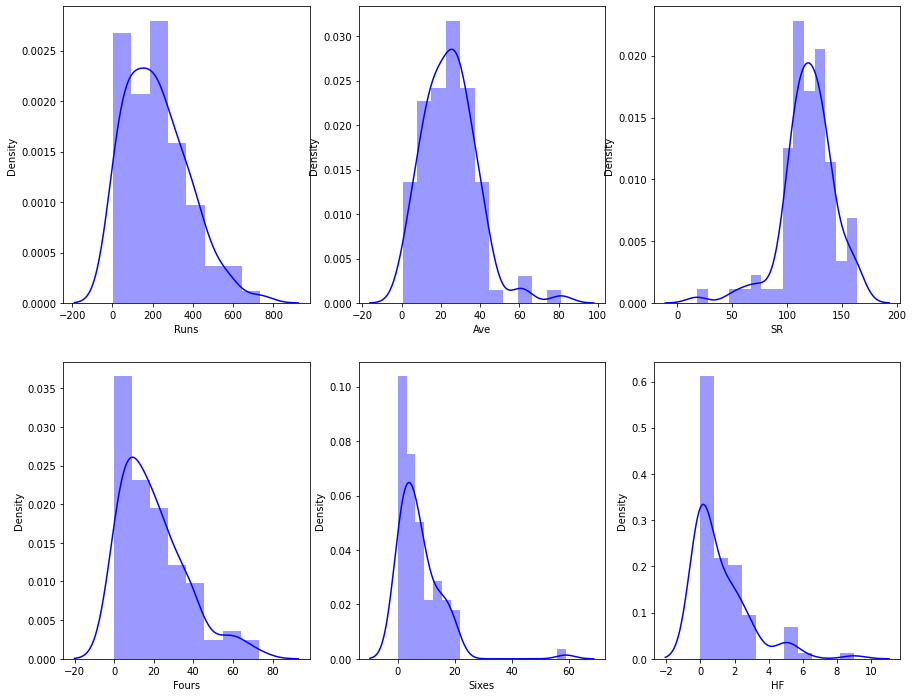

In [1408]:
plt.figure(figsize=(15, 12))
col = 1
for i in bb_df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.distplot(bb_df[i], color = 'b')
    col += 1 

In [1409]:
#Strike rate, fours, sixes and half centuries have a skewed distribution.

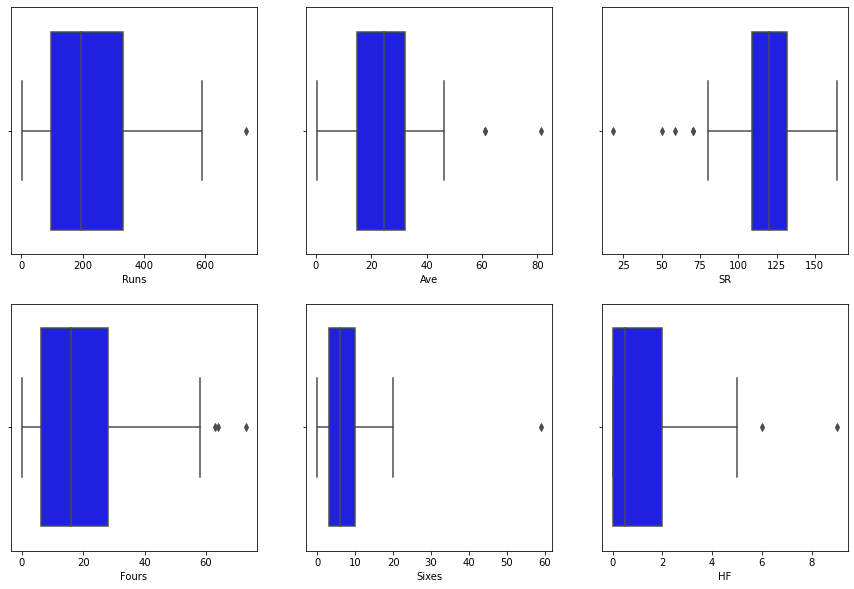

In [1410]:
plt.figure(figsize=(15, 10))
col = 1
for i in bb_df.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(bb_df[i],color='blue')
    col += 1

In [1411]:
#There appears to be outliers, will not be treating them as its highly likely that these are genuine observation

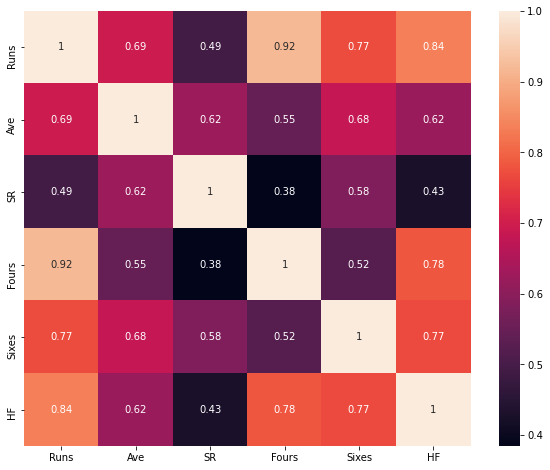

In [1412]:
##Multivariate Data Analysis
#checking for correlation
plt.figure(figsize=(10,8))
corr=bb_df.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

In [1413]:
#Each square shows the correlation between the variables on each axis. 
#Correlation ranges from -1 to +1. 
#Values closer to zero means there is no linear trend between the two variables.
#The close to 1 the correlation is the more positively correlated they are;
#that is as one increases so does the other and the closer to 1 the stronger this relationship

In [1414]:
#scaling the numeric variables
cc_original = bb_df.iloc[:,1:7] 
cc1_scaled = cc_original.apply(stats.zscore)
cc1_scaled.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


In [1415]:
#checking for the within sum of squares
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(cc1_scaled)
    wss.append(KM.inertia_)
wss

[540.0000000000001,
 296.26135354732025,
 223.36518460916952,
 178.1750796759041,
 144.68430051153075]

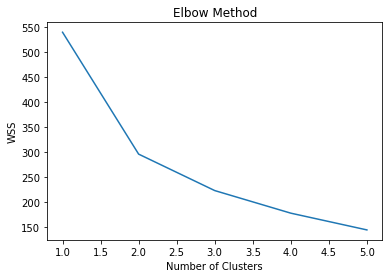

In [1416]:
#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [1417]:
# using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1_scaled)
labels = k_means.labels_

In [1418]:
# Calculating silhouette_score

silhouette_score(cc1_scaled,labels)

0.41111085574076756

In [1419]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1_scaled)
    score = silhouette_score(cc1_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

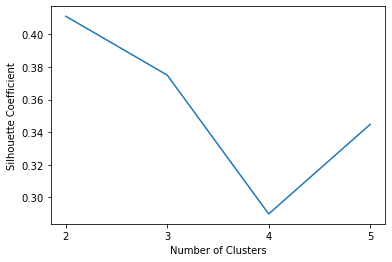

In [1420]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [1421]:
#attaching the labels to the original data
bb_df['cluster']=labels
bb_df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,0


In [1422]:
#veiwing the distribution of the clusters
bb_df.cluster.value_counts().sort_index()

0    35
1    55
Name: cluster, dtype: int64

In [1423]:
#aggregating the clusters with the numeric variables with their mean
aggdata=bb_df.iloc[:,0:9].groupby('cluster').mean()
aggdata['Freq']=bb_df.cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
cluster,,,,,,,
0,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35
1,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55


In [1424]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
bb_df['cluster'] = bb_df['cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [1425]:
#list of Grade A top 10 players
Grade_A = bb_df[bb_df['cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


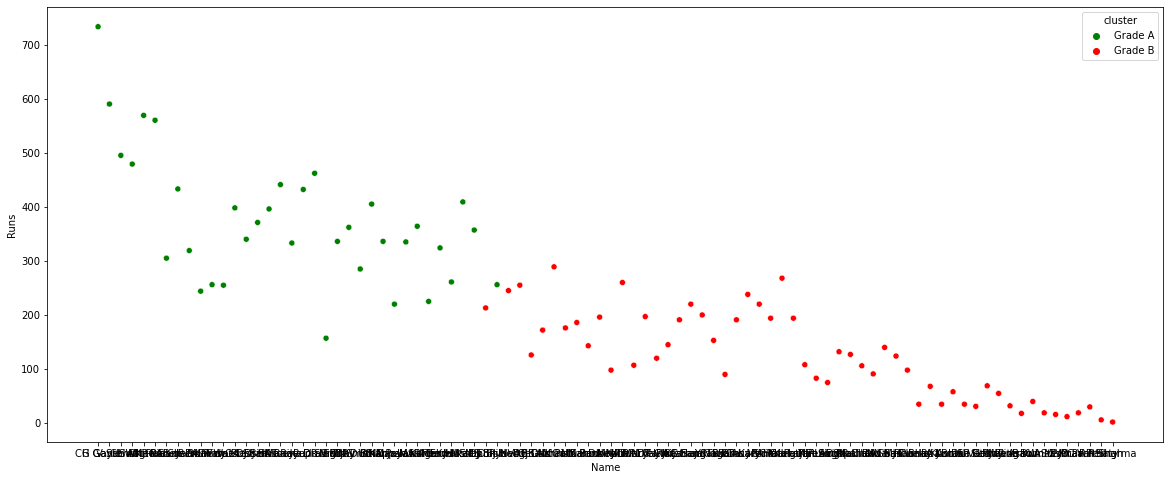

In [1426]:
#plotting the clusters formed
plt.figure(figsize=(20, 8))
sns.scatterplot(x="Name", y="Runs", hue="cluster",
              data=bb_df, 
                    palette=['green','red']);

In [1427]:
# Save rank all the players in the dataset using all or the most important performance features
#and saved in xlsx sheet for further analysis.
bb_df.to_excel('ipl_new.xlsx', index = False)

In [1428]:
#------------------------------------------------Part5------------------------------------------------------------------------

In [1429]:
# 1 List down all possible dimensionality reduction techniques that can be implemented using python.

In [1430]:
# Dimensionality reduction techniques is devided into 2 parts

# I Feature Selection:
#1)Missing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.
#2)Low Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped.
#3)High Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly.
#4)Random Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.
#5)Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets.


#II Dimensionality Reduction : is devided in 2 parts
# a) Component / Factor Based:
    
#1)Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.
#2)Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.
#3)Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components.

# b) Projection Based:
#1)ISOMAP: We use this technique when the data is strongly non-linear.
#2)t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well.
#3)UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE.



In [1431]:
#2 So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and
#text data ? Please illustrate your findings using a simple implementation on python.

In [1432]:
# Dimensional Reduction can be possible over images, video and text data.
#example 1)

from sklearn.datasets import load_digits
digits = load_digits()

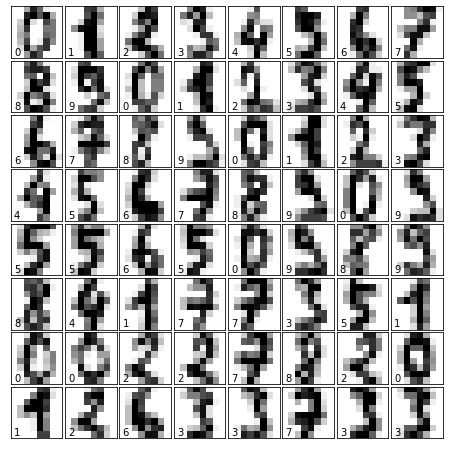

In [1433]:
#Plot the data: images of digits
# Each data in a 8x8 image
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

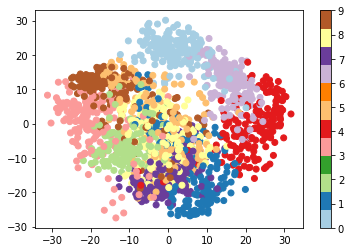

In [1434]:
#Plot a projection on the 2 first principal axis
plt.figure()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

In [1435]:
#Classify with Gaussian naive Bayes

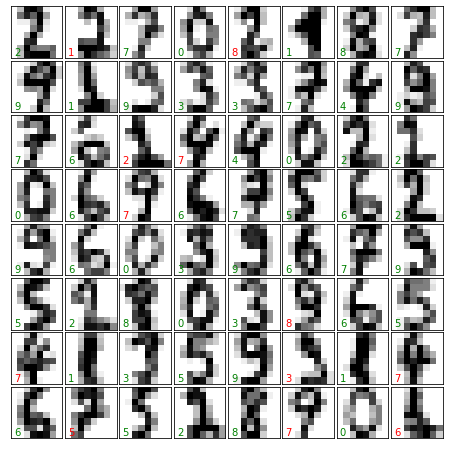

In [1436]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [1437]:
#We’ll use green for correct labels, and red for incorrect labels

In [1438]:
#First print the number of correct matches
matches = (predicted == expected)
print(matches.sum())

371


In [1439]:
#The total number of data points
print(len(matches))

450


In [1440]:
#And now, the ration of correct predictions
matches.sum() / float(len(matches))

0.8244444444444444

In [1441]:
#Print the classification report
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.72      0.73      0.73        49
           2       0.97      0.65      0.78        51
           3       0.97      0.75      0.85        40
           4       0.95      0.79      0.86        48
           5       0.82      0.97      0.89        38
           6       0.92      1.00      0.96        47
           7       0.67      0.93      0.78        40
           8       0.56      0.88      0.68        40
           9       0.92      0.63      0.75        52

    accuracy                           0.82       450
   macro avg       0.85      0.83      0.83       450
weighted avg       0.86      0.82      0.83       450



In [1442]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  2  3  6  1]
 [ 0  6 33  0  0  0  0  0 12  0]
 [ 0  1  0 30  0  2  0  2  3  2]
 [ 0  0  0  0 38  0  1  8  1  0]
 [ 0  0  0  0  0 37  0  0  1  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  1  1  0 37  1  0]
 [ 0  3  0  0  0  1  0  1 35  0]
 [ 0  4  0  1  1  4  1  4  4 33]]


In [1443]:
#PCA is also used for image compression
#example 2)
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [1444]:
img = mpimg.imread('opengenus_logo.png')
print(img.shape)


(156, 194, 3)


(156, 194, 3)


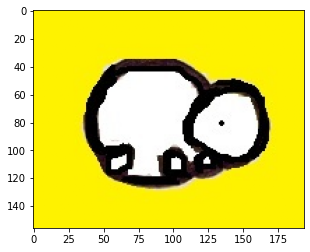

In [1445]:
print(img.shape) 
#Showing the image
plt.imshow(img)

In [1446]:
#Our image is in the form of 156 rows each containing 194 pixels which have 3 channels(RGB).
#We have to resize the image so that it is in the format required for PCA input.
#As 194*3=582, we resize the image to (156,582):
img_r = np.reshape(img, (156, 582)) 
print(img_r.shape) 

(156, 582)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(156, 64)
0.9988685
(156, 194, 3)


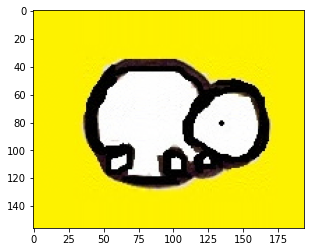

In [1447]:
pca = PCA(64).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (156, 194 ,3)) 
print(temp.shape)


plt.imshow(temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(156, 32)
0.9874846
(156, 194, 3)


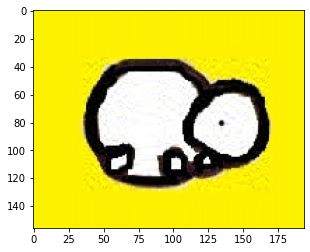

In [1448]:
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (156, 194 ,3)) 
print(temp.shape)
#temp = np.reshape(temp, (156,32 ,3)) 

plt.imshow(temp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(156, 16)
0.9622755
(156, 194, 3)


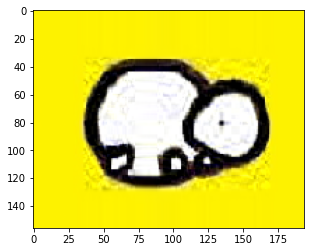

In [1449]:
#Running PCA with 16 Principal Components:
pca = PCA(16).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (156, 194 ,3)) 
print(temp.shape)
#temp = np.reshape(temp, (156,32 ,3)) 

plt.imshow(temp)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(156, 8)
0.91597515
(156, 194, 3)


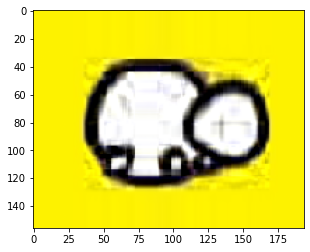

In [1450]:
#Running PCA with 8 Principal Components:
pca = PCA(8).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

#Retrieving the results of the image after Dimension reduction.

temp = pca.inverse_transform(img_transformed) 
temp = np.reshape(temp, (156, 194 ,3)) 
print(temp.shape)
#temp = np.reshape(temp, (156,32 ,3)) 

plt.imshow(temp)


In [1451]:
#Findings
#NUMBER OF PRINCIPAL COMPONENTS -> PERCENTAGE OF VARIANCE EXPRESSED
#64 -> 99.88
#32-> 98.74%
#16 -> 96.22%
#8 -> 91.59%

# Conclusion
# PCA is used as a dimension reduction on image compression, machine learning dataset.